<a href="https://colab.research.google.com/github/xiisii/Data/blob/main/Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Flight Price Prediction**
Định giá vé máy bay theo lịch trình và loại bay

###Dữ liệu:
> Kaggle - https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction?select=economy.csv - `Clean_Dataset.csv`.
Tập dữ liệu được lấy từ trang web "Ease My Trip" - Một nền tảng internet đặt vé máy bay thông dụng.
Dữ liệu được thu thập trong 50 ngày ( 11/02/2022 - 31/03/2022 ) chứa thông tin về các tùy chọn đặt chuyến bay giữa 6 thành phố lớn hàng đầu của Ấn Độ.
Bao gồm 2 phần ( economy, business ), 300261 tùy chọn đặt vé và 11 tính năng.
1. `Airline`: **Hãng hàng không** - phân loại 6 hãng hàng không.
2. `Flight Code`: **Mã chuyến bay** - phân loại chuyến bay.
3. `Source City`: **Nơi cất cánh** - phân loại 6 thành phố.
4. `Departure Time`: **Thời gian khởi hành** - phân loại 6 nhãn thời gian, dữ liệu thu được bằng cách nhóm các khoảng thời gian thành các bins.
5. `Number of Stops`: **Điểm dừng** - phân loại 3 giá trị là số điểm dừng giữa nơi cất cánh và nơi hạ cánh.
6. `Arrival Time`: **Thời gian đến** - phân loại 6 nhãn thời gian, dữ liệu thu được bằng cách nhóm các khoảng thời gian thành các bins.
7. `Destination City`: **Nơi hạ cánh** - phân loại 6 thành phố.
8. `Journey Class`: **Hạng** - phân loại 2 hạng ghế.
9. `Trip Duration`: **Thời lượng** - liên tục hiển thị tổng thời gian bay ( tính bằng giờ ).
10. `Days Left`: **Số ngày còn lại** - số ngày chênh lệch giữa ngày bay và ngày 10/02/2022.
11. `Ticket Price`: **Giá vé** - biến mục tiêu lưu thông tin về giá vé
12. `Date of Journey`: **Ngày hành trình của chuyến bay** - phân loại theo ngày tháng năm.
13. `Day of Week`: **Thời gian hành trình của chuyến bay** - là thời gian ( thứ trong tuần ) của Date of Journey.

###Yêu cầu:
> 1. Tìm ra mối liên quan giữa thông số của các chuyến bay và giá tiền của chúng
2. Xây dựng mô hình định giá vé máy bay theo yêu cầu của người dùng
3. Chạy các mô hình máy học liên quan với bộ dữ liệu huấn luyện
4. Kiểm định mô hình với bộ dữ liệu thực tế

###Cấu trúc:
> 1. Phân tích và xử lý dữ liệu.
2. Mối liên quan giữa chi phí và các thông số còn lại.
3. Mô hình định giá vé máy bay theo yêu cầu người dùng.
4. Các mô hình dự đoán liên quan











#Phân tích và xử lý dữ liệu



###Import & Install library.

---





####**Thư viện:


> 1. `Pandas`: là một thư viện mã nguồn mở dùng để xử lý và phân tích dữ liệu dạng bảng. Nó cung cấp các công cụ để đọc, ghi, lọc, biến đổi và thống kê dữ liệu một cách dễ dàng.
2. `Numpy`: (Numerical Python) là một thư viện mã nguồn mở dùng để làm việc với mảng và ma trận số học. Nó cung cấp các công cụ toán học và thao tác mảng hiệu quả.
3. `Seaborn`: là một thư viện mã nguồn mở dùng để trực quan hóa dữ liệu. Nó cung cấp các công cụ và giao diện đơn giản để tạo ra các biểu đồ thống kê và biểu đồ phân phối hấp dẫn.
4. `Keras`: là một thư viện mã nguồn mở cho việc xây dựng và huấn luyện các mạng neural network. Keras hỗ trợ nhiều backend như TensorFlow, Theano và CNTK.
*   **Keras.models** cung cấp các lớp và công cụ để xây dựng các mô hình học sâu như mạng nơ-ron nhân tạo (Artificial Neural Networks - ANN) và mạng hồi quy (Recurrent Neural Networks - RNN).
*   **Keras.layers** cung cấp các lớp khác nhau để xây dựng các kiến trúc mô hình học sâu, từ các lớp cơ bản như Dense, Conv2D, LSTM đến các lớp đặc biệt như Dropout, BatchNormalization, và nhiều lớp khác.
5. `Matplotlib`:  là một thư viện mã nguồn mở dùng để trực quan hóa dữ liệu. Nó cung cấp các công cụ và chức năng để tạo và tùy chỉnh các biểu đồ và đồ thị.
*   **Matplotlib.pyplot** là một module trong thư viện Matplotlib dùng để vẽ và tùy chỉnh các biểu đồ trong Python. Nó cung cấp các chức năng để tạo các biểu đồ đơn giản và điều chỉnh các yếu tố của chúng.
6. `Datetime`: là một trong những thư viện cốt lõi trong Python và được sử dụng để làm việc với các đối tượng ngày tháng và thời gian. Nó cung cấp các lớp và phương thức để thao tác, định dạng và tính toán các giá trị ngày tháng.
7. `Statsmodels`: là một thư viện mạnh mẽ để thực hiện các phân tích thống kê và mô hình hóa dữ liệu. Nó cung cấp các công cụ và chức năng cho việc thực hiện các phân tích tương quan, hồi quy, mô phỏng dữ liệu, kiểm định giả thuyết và nhiều hơn nữa.
*   **Statsmodels.api** cung cấp nhiều chức năng và phương pháp phân tích thống kê khác nhau, cho phép bạn thực hiện nhiều loại phân tích phức tạp.
8. `Scipy`: là một thư viện Python sử dụng cho tính toán khoa học và tính toán số học. Nó cung cấp các công cụ và chức năng cho tối ưu hóa, tích phân, đại số tuyến tính, xử lý tín hiệu, xử lý hình ảnh, và nhiều lĩnh vực khác liên quan đến khoa học dữ liệu.
*   **Scipy.stats** cung cấp nhiều chức năng và lớp hữu ích cho các tác vụ thống kê và phân tích dữ liệu, và nó là một công cụ quan trọng trong lĩnh vực khoa học dữ liệu và thống kê.
9. `Math`: là một thư viện trong Python cung cấp các hàm toán học cơ bản để thực hiện các phép tính và tính toán trên số học. Bạn có thể sử dụng math để thực hiện các phép tính như căn bậc hai, lũy thừa, logarit, trị tuyệt đối, các hàm trigonometric, và nhiều hàm toán học khác.
10. `Xgboost`: là một thư viện mã nguồn mở được sử dụng trong học máy và khai phá dữ liệu. Nó là một thuật toán học tổ hợp dựa trên gradient boosting và được sử dụng để xây dựng và tinh chỉnh các mô hình học máy mạnh mẽ và hiệu quả.
11. `Catboost`: là một thư viện mã nguồn mở trong học máy được thiết kế để làm việc tốt với dữ liệu có biến rời rạc. Nó tự động xử lý biến rời rạc và có hiệu suất và khả năng tổng quát hóa tốt trên các tập dữ liệu đa dạng. ( cần phải install - Google Colab chưa hỗ trợ sẵn )
12. `Tensorflow`: là một thư viện mã nguồn mở để xây dựng và huấn luyện các mô hình học máy và trí tuệ nhân tạo. Nó cung cấp một cấu trúc dữ liệu gọi là "graph" để mô tả mô hình và sử dụng các phép tính số học để điều chỉnh các tham số. TensorFlow hỗ trợ nhiều công cụ và tính năng mạnh mẽ để tạo ra và triển khai các mô hình học máy phức tạp.
*   **Tensorflow.keras.optimizers** cung cấp các tối ưu hóa để điều chỉnh các tham số mạng nơ-ron trong quá trình huấn luyện. Bạn có thể sử dụng các tối ưu hóa như SGD, RMSprop, Adam, và nhiều thuật toán khác để cải thiện hiệu suất và tốc độ học của mô hình.
13. `Sklearn`: (Scikit-learn) là một thư viện mã nguồn mở trong Python được sử dụng phổ biến trong lĩnh vực học máy và khai phá dữ liệu. Sklearn cung cấp nhiều công cụ và thuật toán học máy để thực hiện các tác vụ như phân loại, hồi quy, gom cụm, và tiền xử lý dữ liệu.
*   **Sklearn.model_selection** được sử dụng để chia tập dữ liệu thành các tập huấn luyện và kiểm tra, và thực hiện các phương pháp đánh giá mô hình.
*   **Sklearn.metrics** cung cấp các hàm để đánh giá hiệu suất của mô hình học máy.
*   **Sklearn.linear_model** chứa các mô hình hồi quy tuyến tính và lasso.
*   **Sklearn.preprocessing** cung cấp các công cụ để tiền xử lý và chuẩn hóa dữ liệu.
*   **Sklearn.compose** cung cấp các công cụ để xử lý dữ liệu độc lập cho từng cột và làm việc với đối tượng mục tiêu trong quá trình huấn luyện mô hình.
*   **Sklearn.ensemble** cung cấp các công cụ để xây dựng và sử dụng các mô hình như random forest, AdaBoost và Gradient Boosting.
*   **Sklearn.tree** bao gồm các mô hình cây quyết định và random forest.
*   **Sklearn.pipeline** cung cấp các lớp quan trọng như Pipeline để xây dựng pipeline, và FeatureUnion để kết hợp các đặc trưng từ các transformer khác nhau.
*   **Sklearn.feature_selection** cung cấp các hàm và lớp để giúp xác định các đặc trưng quan trọng nhất trong một tập dữ liệu.

####**Cài đặt thư viện

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


####**Khai báo thư viện

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import keras
import matplotlib.pyplot as plt
from datetime import timedelta
import statsmodels.api as sm
from scipy.stats import ttest_ind
from math import sqrt
import xgboost as xgb
from catboost import CatBoostRegressor

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.feature_selection import mutual_info_regression

sns.set_style("whitegrid")

###Data Collection and Data Preprocessing

---
Thu thập dữ liệu và Tiền xử lý dữ liệu





####**Cài đặt cấu hình - Giá trị có thể được thay đổi theo yêu cầu

In [ ]:
# Định dạng ngày tháng (ddmmyyyy)
DATE_FORMAT = '%d/%m/%Y'

# Gán nhãn cho khoảng thời gian trong ngày ( Departure Time & Arrival Time )
TIME_PERIOD_LABELS = {

    1: 'Late Night',
    2: 'Early Morning',
    3: 'Morning',
    4: 'Afternoon',
    5: 'Evening',
    6: 'Night'
}

# Định dạng giờ phút để tính toán thời gian bay (hhmm)
TIME_FORMAT = '%H:%M'


# Đổi tên các cột
RENAME_COLUMNS = {
    'airline': 'Airline',
    'from': 'Source City',
    'to': 'Destination City',
    'class': 'Journey Class',
    'price': 'Ticket Price'
}

# Sắp xếp các cột theo thứ tự
COLUMN_ARRANGEMENT = [
    'Airline', 'Source City', 'Departure Time',
    'Number of Stops', 'Destination City', 'Arrival Time',
    'Trip Duration', 'Date of Journey', 'Days Left',
    'Day of Week', 'Flight Code', 'Journey Class', 'Ticket Price'
]

# Sắp xếp dữ liệu theo tiêu chí
SORT_DATA = [
    'Days Left',
    'Ticket Price'
]

# Loại bỏ các cột không cần thiết
DROP_CLEAN_FLIGHTS = [
    'ch_code',
    'num_code',
    'stop',
    'date',
    'price'
]

# Chuyển đổi kiểu dữ liệu của các cột
TRANSFORM_DATATYPE = [
    'Days Left',
    'Ticket Price',
    'Number of Stops'
]

# Loại bỏ các cột không cần thiết liên quan đến thời gian
DROP_TIME_COL = [
    'hour',
    'minute',
    'time_taken',
    'dep_time',
    'arr_time'
]

####**Đọc, xử lý và chuẩn hóa dữ liệu trong dataframe

In [ ]:
def concat_flights(df):
    # Đọc file csv đã tải lên.
    df_business = pd.read_csv('/content/sample_data/business.csv')
    df_economy = pd.read_csv('/content/sample_data/economy.csv')
    # Gán giá trị dựa trên Journey Class
    df_business['class']='Business'
    df_economy['class']='Economy'
    # Kết hợp hai tập dữ liệu thành một và lưu chúng vào một dataframe
    df = pd.concat([df_business,df_economy], axis =0)
    # Hiển thị các hàng trong dataframe sau khi đã kết hợp
    df.head(8)
    return df



def clean_flights(df):
    # Thay thế chuỗi bằng số lượng điểm dừng và gán vào cột mới
    df['Number of Stops']= df['stop'].str.slice(start=0, stop=1).replace('n','0')
    # Thay đổi định dạng ngày và gán vào cột mới
    df['Date of Journey']= df['date'].str.replace('-','/')
    # Thay thế dấu ',' từ chuỗi giá và gán vào cột mới
    df['Ticket Price']= df['price'].str.replace(',','')
    # Ghép hai cột và gán vào cột mới
    df['Flight Code'] =  df['ch_code'] + "-" + df['num_code'].astype(str)
    # Loại bỏ các cột cũ, 'DROP_CLEAN_FLIGHTS' từ tệp cấu hình
    df = df.drop(DROP_CLEAN_FLIGHTS, axis = 1)
    return df

####**Hàm chuyển đổi

In [ ]:
def transform_date(df):
    # Thay đổi kiểu dữ liệu từ chuỗi thành DateTime, định dạng từ 'DATE_FORMAT' trong tệp cấu hình
    df['Date of Journey'] = pd.to_datetime(df['Date of Journey'], format=DATE_FORMAT)
    return df

def transform_days_left(df):
    # Tính toán số ngày còn lại từ ngày khởi hành
    df['Days Left'] = (df['Date of Journey'] + timedelta(days=1)) - min(df['Date of Journey'])
    df['Days Left'] = df['Days Left'].astype(str).str.slice(start=0, stop=2)
    # Thay đổi kiểu dữ liệu, "TRANSFORM_DATATYPE" từ tệp cấu hình
    df[TRANSFORM_DATATYPE] = df[TRANSFORM_DATATYPE].astype(int)
    return df

def transform_day_of_week(df):
    # Gán tên ngày vào một cột mới dựa trên Ngày khởi hành
    df['Day of Week'] = df['Date of Journey'].dt.day_name()
    return df

def transform_departure_time(df):
    # Chuyển đổi thời gian khởi hành thành giờ
    dep_time = (pd.to_datetime(df['dep_time'], format=TIME_FORMAT).dt.hour % 24 + 4) // 4
    dep_time.replace(TIME_PERIOD_LABELS, inplace=True)
    # Gán cột dep_time vào cột mới
    df['Departure Time'] = dep_time
    return df

def transform_arrival_time(df):
    # Chuyển đổi thời gian đến thành giờ
    arr_time = (pd.to_datetime(df['arr_time'], format=TIME_FORMAT).dt.hour % 24 + 4) // 4
    arr_time.replace(TIME_PERIOD_LABELS, inplace=True)
    # Gán cột arr_time vào cột mới
    df['Arrival Time'] = arr_time
    return df

def transform_trip_duration(df):
    # Chuyển đổi chuỗi từ cột time_taken thành giờ và phút
    hour = df['time_taken'].str.split('h ', n=1, expand=True)
    df['hour'] = hour[0]
    df['minute'] = hour[1].str.replace('m', '')
    df['minute'] = np.where(df['minute'] == "", 0, df['minute'])
    # Tính toán thời lượng trong các giá trị float để phân tích tốt hơn trong các mô hình
    df['Trip Duration'] = (df['hour'].astype(float) + (df['minute'].astype(float))/60).round(2)
    # Loại bỏ các cột thời gian tạm thời, 'DROP_TIME_COL' từ tệp cấu hình
    df = df.drop(DROP_TIME_COL, axis=1)
    return df

def transform_rename_columns(df):
    # Đổi tên các cột, RENAME_COLUMNS từ tệp cấu hình
    df.rename(columns= RENAME_COLUMNS, inplace=True)
    # Sắp xếp lại các cột theo định dạng mong muốn, 'COLUMN_ARRANGEMENT' từ tệp cấu hình
    df = df[COLUMN_ARRANGEMENT]
    return df

def transform_sort(df):
    # Sắp xếp dữ liệu, SORT_DATA từ tệp cấu hình
    df = df.sort_values(by= SORT_DATA)
    return df

def drop_airlines(df):
    # Loại bỏ một số hàng trong Airline, do số lượng dữ liệu có sẵn ít
    df = df[df['Airline'] != 'StarAir']
    df = df[df['Airline'] != 'Trujet']
    return df

def transform_flights(df):
    # Gọi tất cả các hàm và gán chúng vào dataframe gốc
    df = transform_date(df)
    df = transform_days_left(df)
    df = transform_day_of_week(df)
    df = transform_departure_time(df)
    df = transform_arrival_time(df)
    df = transform_trip_duration(df)
    df = transform_rename_columns(df)
    df = transform_sort(df)
    df = drop_airlines(df)
    return df

####**Tạo Pipeline để trực quan hóa quá trình tiền xử lý một cách hiệu quả

In [ ]:
# Tạo Pipeline để giúp trực quan hóa sự chuyển đổi trong các cột
# Bước đầu tiên xử lý các biến đổi liên quan đến ngày
transform_day = ColumnTransformer([
    ('transform_date', FunctionTransformer(transform_date), ['date_column']),
    ('transform_days_left', FunctionTransformer(transform_days_left), ['days_left_column']),
    ('transform_day_of_week', FunctionTransformer(transform_day_of_week), ['day_of_week_column'])
])

# Bước thứ hai xử lý các biến đổi liên quan đến thời gian
transform_time = ColumnTransformer([
    ('transform_departure_time', FunctionTransformer(transform_departure_time), ['departure_time_column']),
    ('transform_arrival_time', FunctionTransformer(transform_arrival_time), ['arrival_time_column']),
    ('transform_trip_duration', FunctionTransformer(transform_trip_duration), ['trip_duration_column'])
])

# Bước thứ ba xử lý các biến đổi liên quan đến cột
transform_columns = ColumnTransformer([
    ('transform_rename_columns', FunctionTransformer(transform_rename_columns), None),
    ('transform_sort', FunctionTransformer(transform_sort), None)
])

# Tạo Pipeline và gán các bước biến đổi
preprocess_pipeline = Pipeline([
    ('transform_day', transform_day),
    ('transform_time', transform_time),
    ('transform_columns', transform_columns),
])

# Hiển thị biểu đồ của Pipeline
set_config(display="diagram")
preprocess_pipeline

Pipeline(steps=[('transform_day',
                 ColumnTransformer(transformers=[('transform_date',
                                                  FunctionTransformer(func=<function transform_date at 0x7f9bad19b490>),
                                                  ['date_column']),
                                                 ('transform_days_left',
                                                  FunctionTransformer(func=<function transform_days_left at 0x7f9bad19b520>),
                                                  ['days_left_column']),
                                                 ('transform_day_of_week',
                                                  FunctionTransformer(func=<function transfo...
                                                  FunctionTransformer(func=<function transform_trip_duration at 0x7f9bad19b6d0>),
                                                  ['trip_duration_column'])])),
                ('transform_columns',
                 ColumnTransformer(transformers=[('transform_rename_columns',
                                                  FunctionTransformer(func=<function transform_rename_columns at 0x7f9bad19b760>),
                                                  None),
                                                 ('transform_sort',
                                                  FunctionTransformer(func=<function transform_sort at 0x7f9bad19bbe0>),
                                                  None)]))])

####**Hàm Pipeline

In [ ]:
def preprocess_pipeline(df):
    # Hàm tiền xử lý để gọi tất cả các hàm theo thứ tự
    df = concat_flights(df)
    df = clean_flights(df)
    df = transform_flights(df)
    df = drop_airlines(df)
    return df

In [ ]:
# Hiển thị thời gian thực thi
%%time
df =[]
# Gán giá trị của df sau khi chạy hàm preprocess_pipeline vào preprocessed_df
preprocessed_df = preprocess_pipeline(df)
# head() - Trả về một tập con của DataFrame gồm các hàng đầu tiên ( mặc định là 5 ).
preprocessed_df.head()

CPU times: user 8.54 s, sys: 443 ms, total: 8.99 s
Wall time: 9.49 s


Airline Source City Departure Time  Number of Stops Destination City  \
165631  GO FIRST   Hyderabad      Afternoon                0        Bangalore   
70310     Indigo      Mumbai        Evening                0        Hyderabad   
70311     Indigo      Mumbai        Evening                0        Hyderabad   
127555   AirAsia     Kolkata        Evening                2           Mumbai   
127556   AirAsia     Kolkata        Evening                2           Mumbai   

         Arrival Time  Trip Duration Date of Journey  Days Left Day of Week  \
165631      Afternoon           1.25      2022-02-11          1      Friday   
70310         Evening           1.42      2022-02-11          1      Friday   
70311         Evening           1.33      2022-02-11          1      Friday   
127555  Early Morning          11.50      2022-02-11          1      Friday   
127556        Morning          15.58      2022-02-11          1      Friday   

       Flight Code Journey Class  Ticket Price  
165631      G8-806       Economy          4452  
70310      6E-5208       Economy          4841  
70311      6E-5217       Economy          4946  
127555     I5-1563       Economy          5070  
127556     I5-1563       Economy          5070

In [ ]:
# Lưu dataframe thành tệp CSV
preprocessed_df.to_csv('cleaned_flight_dataset.csv', index=False)

In [ ]:
# Gán giá trị của preprocessed_df vào df
df = preprocessed_df

In [ ]:
# df.shape[0] - Trả về số hàng (số quan sát - observation) của DataFrame.
# df.shape[1] - Trả về số cột (số biến dự đoán - predictors) của DataFrame.
print("There are {} observations for {} predictors.".format(df.shape[0],df.shape[1]))

There are 300159 observations for 13 predictors.


In [ ]:
# df.isnull().sum() - Đếm số lượng giá trị thiếu (NaN) trong từng cột của DataFrame
df.isnull().sum()

Airline             0
Source City         0
Departure Time      0
Number of Stops     0
Destination City    0
Arrival Time        0
Trip Duration       0
Date of Journey     0
Days Left           0
Day of Week         0
Flight Code         0
Journey Class       0
Ticket Price        0
dtype: int64

In [ ]:
# df.describe() - Tạo một tóm tắt thống kê của DataFrame
# Nó cung cấp các thông số thống kê cơ bản như số lượng quan sát, giá trị trung bình (mean), độ lệch chuẩn (standard deviation), giá trị tối thiểu (minimum), các phần centile (25%, 50%, 75%), và giá trị tối đa (maximum) cho từng cột dữ liệu.
df.describe()

Number of Stops  Trip Duration      Days Left   Ticket Price
count    300159.000000  300159.000000  300159.000000  300159.000000
mean          0.924320      12.220923      26.004558   20889.368728
std           0.398111       7.192079      13.560982   22697.637487
min           0.000000       0.830000       1.000000    1105.000000
25%           1.000000       6.830000      15.000000    4783.000000
50%           1.000000      11.250000      26.000000    7425.000000
75%           1.000000      16.170000      38.000000   42521.000000
max           2.000000      49.830000      49.000000  123071.000000

In [ ]:
# df.info() -In ra thông tin tổng quan về DataFrame.
# Nó cung cấp thông tin về số lượng hàng, số lượng cột, các tên cột, kiểu dữ liệu của từng cột và số lượng giá trị không thiếu (non-null) trong mỗi cột.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300159 entries, 165631 to 80957
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Airline           300159 non-null  object        
 1   Source City       300159 non-null  object        
 2   Departure Time    300159 non-null  object        
 3   Number of Stops   300159 non-null  int64         
 4   Destination City  300159 non-null  object        
 5   Arrival Time      300159 non-null  object        
 6   Trip Duration     300159 non-null  float64       
 7   Date of Journey   300159 non-null  datetime64[ns]
 8   Days Left         300159 non-null  int64         
 9   Day of Week       300159 non-null  object        
 10  Flight Code       300159 non-null  object        
 11  Journey Class     300159 non-null  object        
 12  Ticket Price      300159 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
m

#Mối liên quan giữa chi phí và các thông số còn lại


###Exploratory Data Analysis
---
Phân tích dữ liệu khám phá (EDA)

####**Cài đặt cấu hình - Giá trị có thể được thay đổi theo yêu cầu

In [ ]:
# Danh sách cho hàm plots visualisation
list1 = ['Source City', 'Destination City', 'Airline', 'Arrival Time', 'Departure Time']

# Màu sắc cho hàm plots visualisation
list1_colors = ['coral', 'orange', 'green', 'darkseagreen', 'darkslategrey']

# Màu sắc cho biểu đồ đường của các hãng hàng không
airline_colors = {
    'Vistara': 'coral',
    'Indigo': 'orange',
    'Air India': 'green',
    'SpiceJet': 'brown',
    'AirAsia': 'darkslategrey',
    'GO FIRST': 'blue'
}

####**Đồ thị các giá trị phân loại

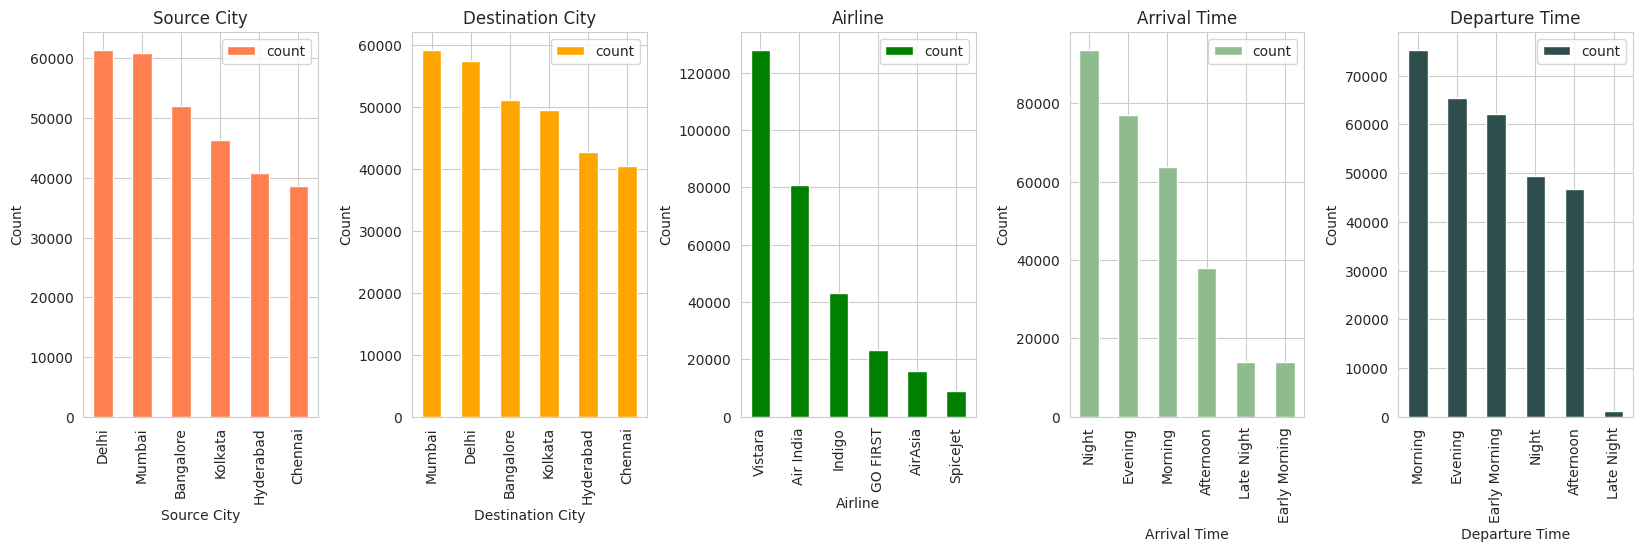

In [ ]:
# Vẽ tất cả các biểu đồ trên cùng một dòng
fig, axes = plt.subplots(1, len(list1), figsize=(20, 5))

# Điều chỉnh khoảng cách giữa các biểu đồ
fig.subplots_adjust(wspace=0.4)

# Lặp để vẽ biểu đồ cho mỗi cột, list1 từ tệp cấu hình
for i, l in enumerate(list1):
    counts = df[[l]].value_counts().reset_index(name='count')
    counts.plot(x=l, y='count', kind='bar', ax=axes[i], color=list1_colors[i % len(list1_colors)])
    axes[i].set_title(l)
    axes[i].set_xlabel(l)
    axes[i].set_ylabel('Count')

# Hiển thị biểu đồ
plt.show()

####**Đồ thị của Giá vé với số lượng tương ứng

<Axes: xlabel='Ticket Price', ylabel='Count'>

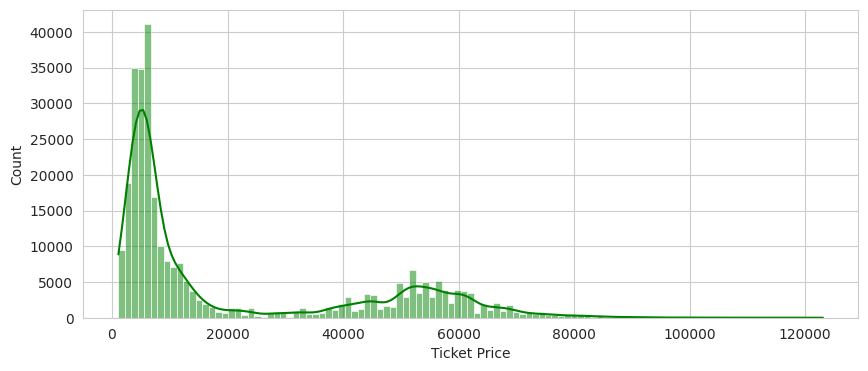

In [ ]:
fig = plt.figure(figsize=(10,4))

# Vẽ biểu đồ histogram sử dụng seaborn với KDE
sns.histplot(data=df, x='Ticket Price', color="green", label="Airline", kde=True)

####**Đồ thị thể hiện sự thay đổi của giá vé theo các hãng hàng không

<Axes: xlabel='Airline', ylabel='Ticket Price'>

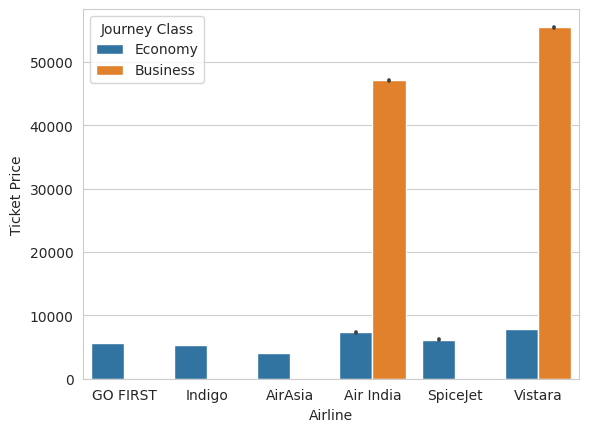

In [ ]:
sns.barplot(data=df, x='Airline', y='Ticket Price', hue='Journey Class')

Từ Đồ thị ta thấy rằng, ở Hạng Phổ thông, Vistara là đắt nhất và Air Asia là rẻ nhất

Trong khi ở Hạng Thương gia, Vistara là đắt nhất và Air India là rẻ nhất

####**Đồ thị thể hiện sự ảnh hưởng của thời gian mua vé với giá vé

<Axes: xlabel='Days Left', ylabel='Ticket Price'>

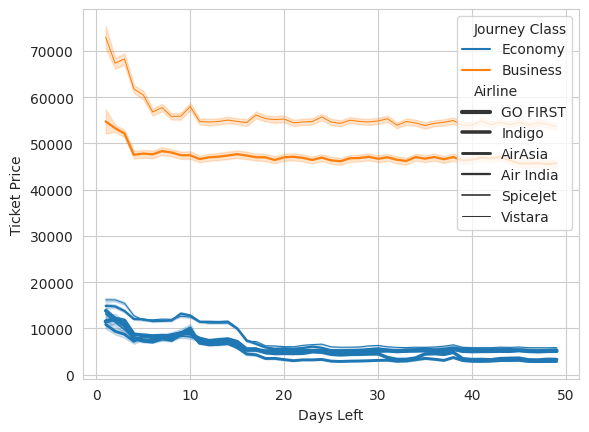

In [ ]:
sns.lineplot(data=df, x='Days Left', y='Ticket Price', hue='Journey Class', size='Airline')

Dựa trên phân tích dữ liệu, rõ ràng là giá vé máy bay tăng đáng kể khi được mua chỉ 1-2 ngày trước ngày khởi hành theo lịch trình, trong đó hạng Thương gia có thể tăng giá cao hơn so với vé hạng Phổ thông.

Hơn nữa, dữ liệu cho thấy giá vé tương đối ổn định trong một thời gian dài trước khi tăng đột ngột khoảng 30-35% đối với vé hạng Thương gia của Vistara Airlines và khoảng 15% đối với Air_India.

Để đảm bảo có được vé tiết kiệm chi phí nhất, nên mua vé hạng Phổ thông ít nhất ba tuần trước ngày khởi hành, trong khi đối với vé hạng Thương gia, nên mua vé ít nhất mười ngày trước ngày khởi hành theo lịch trình.

---
Ngoài ra có thể vẽ đồ thị thể hiện sự ảnh hưởng của thời gian mua vé với giá trị trung bình của giá vé

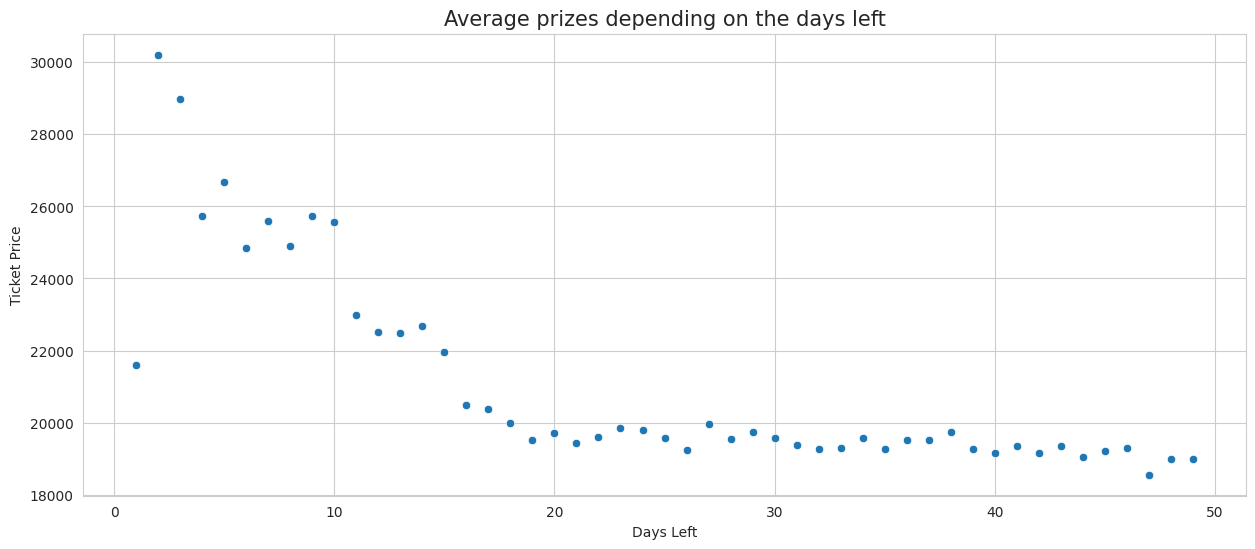

In [ ]:
# Nhóm dữ liệu ( groupby ), tính giá trị trung bình ( mean ) và thiết lập lại chỉ số ( reset_index )
df_temp = df.groupby(['Days Left'])['Ticket Price'].mean().reset_index()

# Vẽ đồ thị scatter hiển thị mối quan hệ giữa Days Left và Ticket Price
plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="Days Left", y="Ticket Price", data=df_temp).set_title("Average prizes depending on the days left",fontsize=15)

Có thể thấy hai đường cong khác nhau trên biểu đồ này, đường cong thứ nhất ổn định trong khoảng từ 50 đến 20 ngày trước chuyến bay và một đường cong đơn điệu dương trong khoảng từ 20 đến 2 ngày trước đó.

<Axes: xlabel='Days Left', ylabel='Ticket Price'>

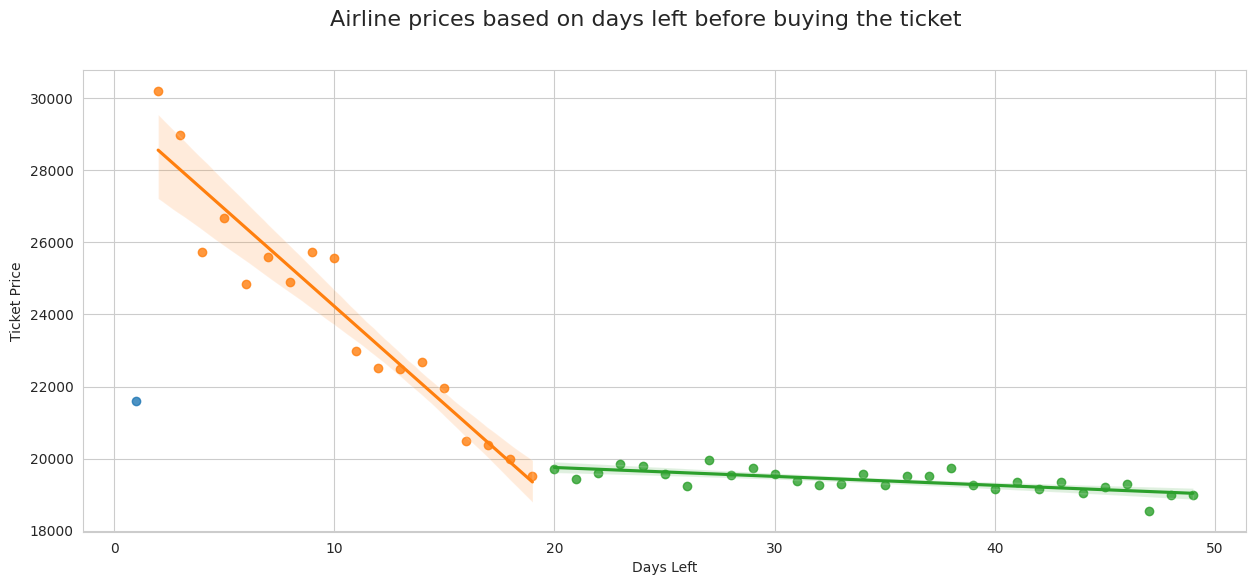

In [ ]:
plt.figure(figsize=(15,6)).suptitle('Airline prices based on days left before buying the ticket', fontsize=16)
ax = plt.axes()
sns.regplot(x=df_temp.loc[df_temp["Days Left"]==1]['Days Left'], y=df_temp.loc[df_temp["Days Left"]==1]['Ticket Price'], fit_reg=False, ax=ax)
sns.regplot(x=df_temp.loc[(df_temp["Days Left"]>1)&(df_temp["Days Left"]<20)]['Days Left'], y=df_temp.loc[(df_temp["Days Left"]>1)&(df_temp["Days Left"]<20)]['Ticket Price'], fit_reg=True, ax=ax)
sns.regplot(x=df_temp.loc[df_temp["Days Left"]>=20]['Days Left'], y=df_temp.loc[df_temp["Days Left"]>=20]['Ticket Price'], fit_reg=True, ax=ax)

Có thể nhìn thấy rõ ràng trong cách giá phát triển tùy thuộc vào số ngày còn lại.
> Biểu đồ cho thấy mức giá tăng chậm và sau đó bắt đầu tăng mạnh 20 ngày trước chuyến bay, nhưng giảm chỉ một ngày trước chuyến bay với giá rẻ hơn tới ba lần. Điều này có thể giải thích là do các hãng muốn lấp đầy ghế trống nên hạ giá vé để đảm bảo máy bay luôn đầy khách.

####**Tách các giá trị cho Business và Economy để trực quan hóa tốt hơn

In [ ]:
# Chọn các hàng có hạng Hành trình là Thương gia hoặc Phổ thông
business_flights = df[df['Journey Class'] == 'Business']
economy_flights = df[df['Journey Class'] == 'Economy']

####****Đồ thị thể hiện sự thay đổi của giá vé với Thời gian khởi hành và Thời gian đến

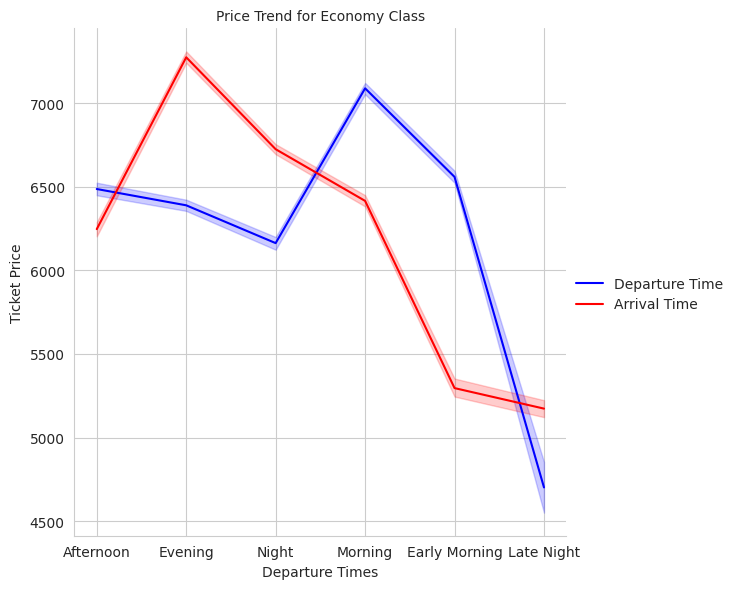

In [ ]:
grid = sns.FacetGrid(economy_flights, col="Journey Class", height=6)
grid.map(sns.lineplot, 'Departure Time', 'Ticket Price', color='blue', label='Departure Time')
grid.map(sns.lineplot, 'Arrival Time', 'Ticket Price', color='red', label='Arrival Time')
grid.set_axis_labels("Departure Times", "Ticket Price")
grid.add_legend()
grid.set_titles("Price Trend for Economy Class")

Đối với hạng Phổ thông, Giá vé có xu hướng cao hơn khi Thời gian khởi hành là buổi sáng và giảm dần khi ngày trôi qua, chạm mức thấp nhất vào buổi tối trước khi tăng trở lại vào ban đêm.

Tương tự như vậy, giá có xu hướng cao hơn khi thời gian đến là vào buổi chiều hoặc buổi tối, với giá thấp hơn vào buổi sáng hoặc buổi tối.

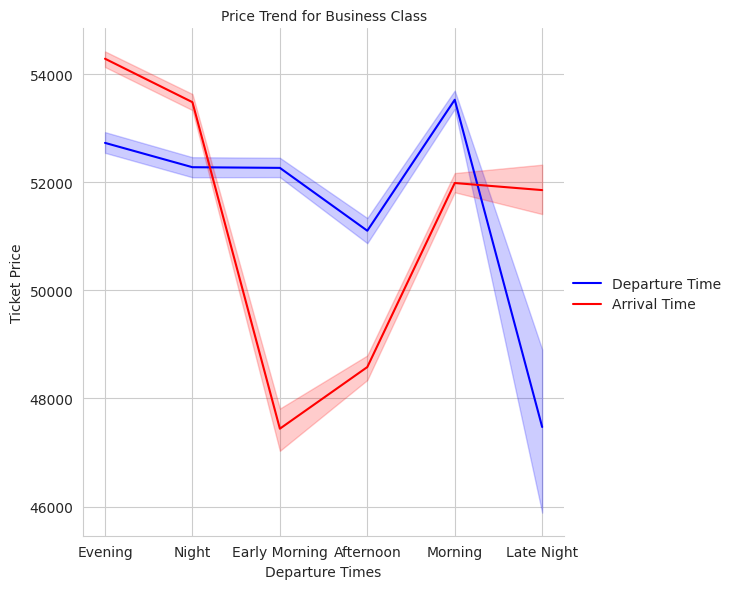

In [ ]:
grid = sns.FacetGrid(business_flights, col="Journey Class", height=6)
grid.map(sns.lineplot, 'Departure Time', 'Ticket Price', color='blue', label='Departure Time')
grid.map(sns.lineplot, 'Arrival Time', 'Ticket Price', color='red', label='Arrival Time')
grid.set_axis_labels("Departure Times", "Ticket Price")
grid.add_legend()
grid.set_titles("Price Trend for Business Class")

Xu hướng của hạng Thương gia hơi khác so với hạng Phổ thông, với giá vé có xu hướng cao nhất vào buổi chiều và buổi tối, và thấp hơn vào buổi sáng hoặc buổi tối.

####**Đồ thị thể hiện sự thay đổi của Giá vé tùy thuộc vào Nơi cất cánh và Nơi hạ cánh

Giá trị trung bình của giá vé và Nơi cất cánh

In [ ]:
# Tạo dataframe rỗng với các cột city, p_class, mean_ticket_price
result_df = pd.DataFrame(columns=['city', 'p_class', 'mean_ticket_price'])

# Xử lý dữ liệu gốc kết quả cuối cùng trả về result_df chứa các thông tin về thành phố, class, giá trị trung bình của giá vé
# Vòng lặp đầu tiên để duyệt qua từng thành phố trong cột 'Source City'
for city in df['Source City'].unique():
    for p_class in df['Journey Class'].unique():
        # Tính giá trị trung bình của cột Ticket Price.
        mean_ticket_price = df['Ticket Price'].loc[(df['Source City'] == city) & (df['Journey Class'] == p_class)].mean()
        # Thêm hàng mới vào result_df với các giá trị city, p_class và mean_ticket_price tương ứng
        result_df = result_df.append({'city': city, 'p_class': p_class, 'mean_ticket_price': mean_ticket_price},
                                     ignore_index=True)

<ipython-input-27-908ca29c1de8>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'city': city, 'p_class': p_class, 'mean_ticket_price': mean_ticket_price},
<ipython-input-27-908ca29c1de8>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'city': city, 'p_class': p_class, 'mean_ticket_price': mean_ticket_price},
<ipython-input-27-908ca29c1de8>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'city': city, 'p_class': p_class, 'mean_ticket_price': mean_ticket_price},
<ipython-input-27-908ca29c1de8>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  r

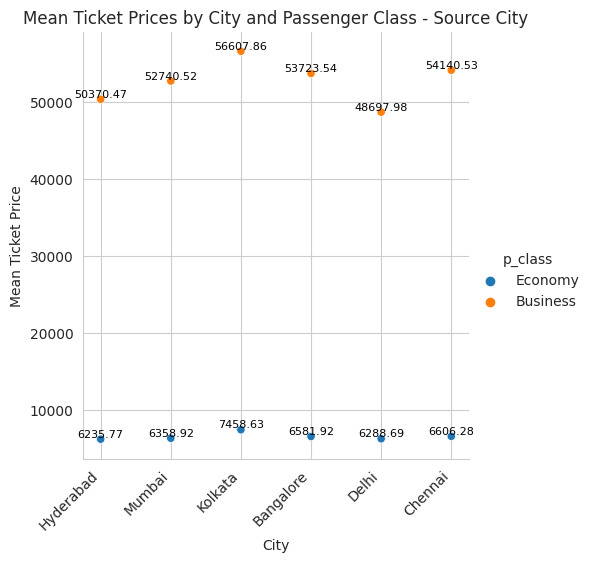

In [ ]:
# Vẽ biểu đồ Scatterplot đa biến hiển thị giá trị trung bình của giá vé theo thành phố và lớp hành trình
sns.set_style('whitegrid')
g = sns.relplot(data=result_df, x='city', y='mean_ticket_price', hue='p_class')
for _, row in result_df.iterrows():
    g.ax.text(row['city'], row['mean_ticket_price'], f'{row["mean_ticket_price"]:.2f}',
              color='black', ha='center', va='bottom', fontsize=8)

# Chú thích biểu đồ
plt.xticks(rotation=45, ha='right')
plt.title('Mean Ticket Prices by City and Passenger Class - Source City')
plt.xlabel('City')
plt.ylabel('Mean Ticket Price')
plt.show()

<ipython-input-29-a7e60d4b20d1>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  g = sns.heatmap(data=result_df.pivot('city', 'p_class', 'mean_ticket_price'), cmap='RdYlBu_r', annot=True, fmt='.2f')


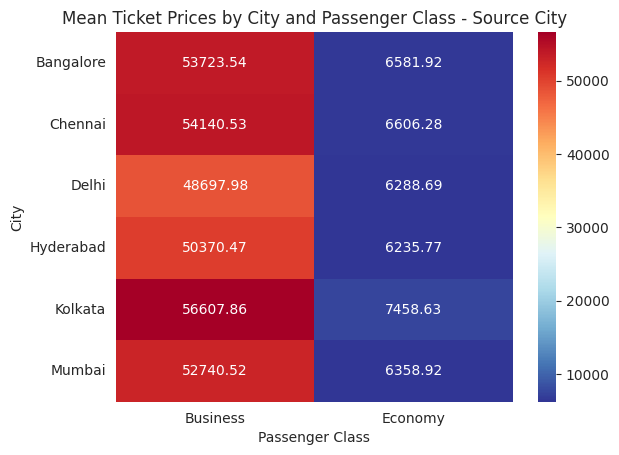

In [ ]:
# Vẽ biểu đồ Heatmap đa biến hiển thị giá trị trung bình của giá vé theo thành phố và class
sns.set_style('whitegrid')
g = sns.heatmap(data=result_df.pivot('city', 'p_class', 'mean_ticket_price'), cmap='RdYlBu_r', annot=True, fmt='.2f')
g.set_title('Mean Ticket Prices by City and Passenger Class - Source City')
g.set_xlabel('Passenger Class')
g.set_ylabel('City')
plt.show()

Có thể thấy giá vé trung bình của Business cao hơn rất nhiều so với Economy ( gấp xấp xỉ 9 lần )

Giá trị trung bình của giá vé theo thành phố, cả 2 class thành phố Kolkata đều cao nhất, mức độ cao thấp của các thành phố trong 2 class cũng tương tự. Tuy nhiên thành phố thấp nhất của Business là Delhi, của Economy là Hyberabad

---
Giá trị trung bình của giá vé và Nơi hạ cánh


In [ ]:
# Tạo dataframe rỗng với các cột city, p_class, mean_ticket_price
result_df = pd.DataFrame(columns=['city', 'p_class', 'mean_ticket_price'])

# Xử lý dữ liệu gốc kết quả cuối cùng trả về result_df chứa các thông tin về thành phố, class, giá trị trung bình của giá vé
# Vòng lặp đầu tiên để duyệt qua từng thành phố trong cột 'Destination City'
for city in df['Destination City'].unique():
    for p_class in df['Journey Class'].unique():
        # Tính giá trị trung bình của cột Ticket Price.
        mean_ticket_price = df['Ticket Price'].loc[(df['Destination City'] == city) & (df['Journey Class'] == p_class)].mean()
        # Thêm hàng mới vào result_df với các giá trị city, p_class và mean_ticket_price tương ứng
        result_df = result_df.append({'city': city, 'p_class': p_class, 'mean_ticket_price': mean_ticket_price},
                                     ignore_index=True)

<ipython-input-30-4a3d7d781b79>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'city': city, 'p_class': p_class, 'mean_ticket_price': mean_ticket_price},
<ipython-input-30-4a3d7d781b79>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'city': city, 'p_class': p_class, 'mean_ticket_price': mean_ticket_price},
<ipython-input-30-4a3d7d781b79>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'city': city, 'p_class': p_class, 'mean_ticket_price': mean_ticket_price},
<ipython-input-30-4a3d7d781b79>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  r

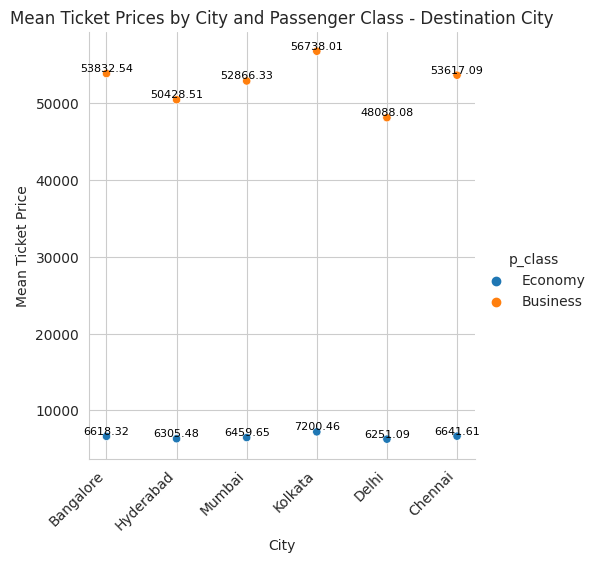

In [ ]:
# Vẽ biểu đồ Scatterplot đa biến hiển thị giá trị trung bình của giá vé theo thành phố và lớp hành trình
sns.set_style('whitegrid')
g = sns.relplot(data=result_df, x='city', y='mean_ticket_price', hue='p_class')
for _, row in result_df.iterrows():
    g.ax.text(row['city'], row['mean_ticket_price'], f'{row["mean_ticket_price"]:.2f}',
              color='black', ha='center', va='bottom', fontsize=8)

# Chú thích biểu đồ
plt.xticks(rotation=45, ha='right')
plt.title('Mean Ticket Prices by City and Passenger Class - Destination City')
plt.xlabel('City')
plt.ylabel('Mean Ticket Price')
plt.show()

<ipython-input-32-996f9eb8a360>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  g = sns.heatmap(data=result_df.pivot('city', 'p_class', 'mean_ticket_price'), cmap='RdYlBu_r', annot=True, fmt='.2f')


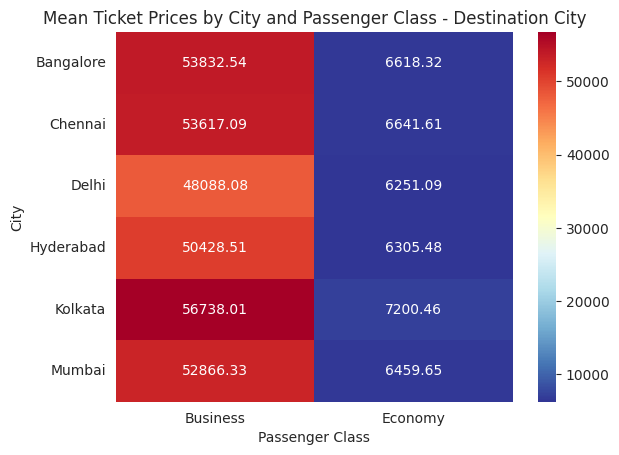

In [ ]:
# Vẽ biểu đồ Heatmap đa biến hiển thị giá trị trung bình của giá vé theo thành phố và class
sns.set_style('whitegrid')
g = sns.heatmap(data=result_df.pivot('city', 'p_class', 'mean_ticket_price'), cmap='RdYlBu_r', annot=True, fmt='.2f')
g.set_title('Mean Ticket Prices by City and Passenger Class - Destination City')
g.set_xlabel('Passenger Class')
g.set_ylabel('City')
plt.show()

Có thể thấy giá vé trung bình của Business cao hơn rất nhiều so với Economy ( gấp xấp xỉ 9 lần )

Giá trị trung bình của giá vé theo thành phố, cả 2 class thành phố Kolkata đều cao nhất, thành phố Delhi đều thấp nhất, mức độ cao thấp của các thành phố trong 2 class cũng tương tự.

####**Đồ thị thể hiện Giá trung bình theo lộ trình của class

In [ ]:
# Thêm cột Route vào df ( kết hợp Source City và Destination City )
df["Route"] = df['Source City'] + '-' + df['Destination City']

In [ ]:
# Nhóm dữ liệu theo cột Route, tính giá trị trung bình của giá vé và sắp xếp theo thứ tự giảm dần theo Economy Class
e_route_df = df.groupby('Route').apply(lambda df: df['Ticket Price'].loc[df['Journey Class'] == 'Economy'].mean()).sort_values(ascending=False)
# Nhóm dữ liệu theo cột Route, tính giá trị trung bình của giá vé và sắp xếp theo thứ tự giảm dần theo Business Class
b_route_df = df.groupby('Route').apply(lambda df: df['Ticket Price'].loc[df['Journey Class'] == 'Business'].mean()).sort_values(ascending=False)

Giá trung bình theo lộ trình của Economy Class

Text(0.5, 0, 'Ticket Price')

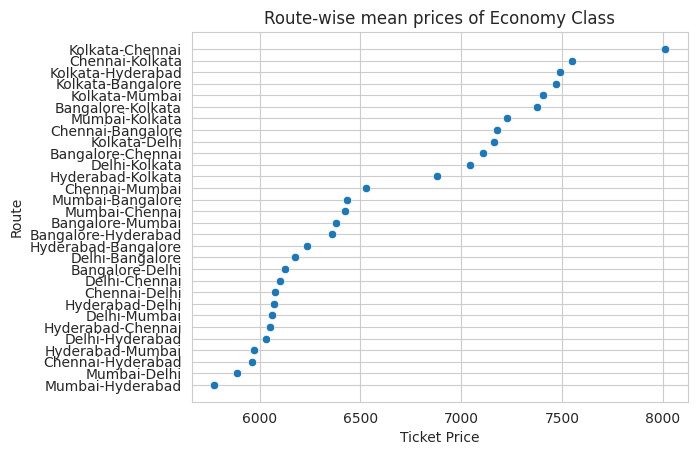

In [ ]:
# Vẽ biểu đồ scatter plot sử dụng dữ liệu từ "e_route_df"
# Thể hiện giá trị trung bình của vé theo từng tuyến đường trong lớp hạng "Economy"
sns.set_style('whitegrid')
g = sns.scatterplot(data=e_route_df, y='Route', x=e_route_df.values)
g.set_title("Route-wise mean prices of Economy Class")
g.set_xlabel("Ticket Price")

Giá trung bình theo lộ trình của Business Class

Text(0.5, 0, 'Ticket Price')

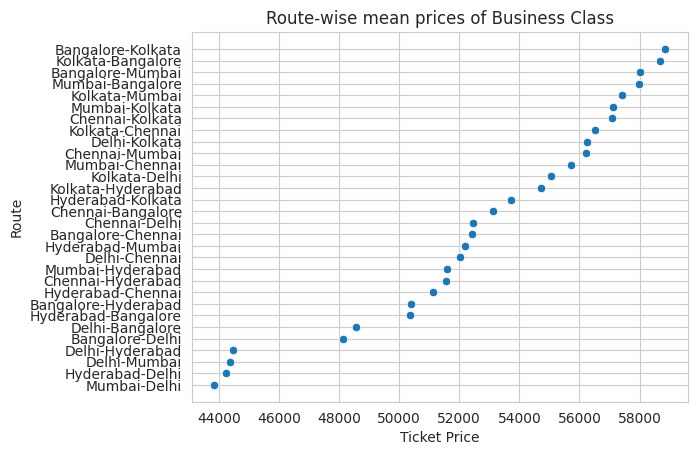

In [ ]:
# Vẽ biểu đồ scatter plot sử dụng dữ liệu từ "b_route_df"
# Thể hiện giá trị trung bình của vé theo từng tuyến đường trong lớp hạng "Business"
sns.set_style('whitegrid')
g = sns.scatterplot(data=b_route_df, y='Route', x=b_route_df.values)
g.set_title("Route-wise mean prices of Business Class")
g.set_xlabel("Ticket Price")

Dữ liệu cho thấy các chuyến bay khởi hành từ Delhi có vé rẻ nhất, tiếp theo là Hyderabad, Mumbai, Bangalore, Chennai và Kolkata, nơi vé cho các chuyến bay khởi hành đắt nhất. Tương tự, vé cho các chuyến bay đến Delhi là rẻ nhất, tiếp theo là Hyderabad, Mumbai, Bangalore, Chennai và Kolkata, nơi vé cho các chuyến bay đến đắt nhất.

Về giá vé trung bình cho các tuyến đường cụ thể, Chennai-Kolkata và Kolkata-Chennai có vé phổ thông đắt nhất trung bình, trong khi vé hạng thương gia cho Bangalore-Kolkata và Kolkata-Bangalore là đắt nhất. Điều này thật thú vị vì nó không có ý nghĩa về mặt địa lý và có thể là do lý do hậu cần.

Đối với hạng phổ thông, Mumbai-Hyderabad là tuyến rẻ nhất, tiếp theo là Mumbai-Delhi và Chennai-Hyderabad. Đối với hạng thương gia, Mumbai-Delhi là tuyến rẻ nhất, tiếp theo là Hyderabad-Delhi và Delhi-Mumbai.

####**Đồ thị thể hiện sự khác nhau giữa giá vé hạng Phổ thông ( Economy ) và giá vé hàng Thương giá ( Business )

In [ ]:
# Tạo dataframe class_df được nhóm theo cột Journey Class và giá trị trung bình của giá vé
class_df = df.groupby('Journey Class').apply(lambda df: df['Ticket Price'].mean())
# Chuyển đổi chuỗi kết quả thành df và đặt lại index
class_df = class_df.to_frame().reset_index()
class_df.dtypes

Journey Class     object
0                float64
dtype: object

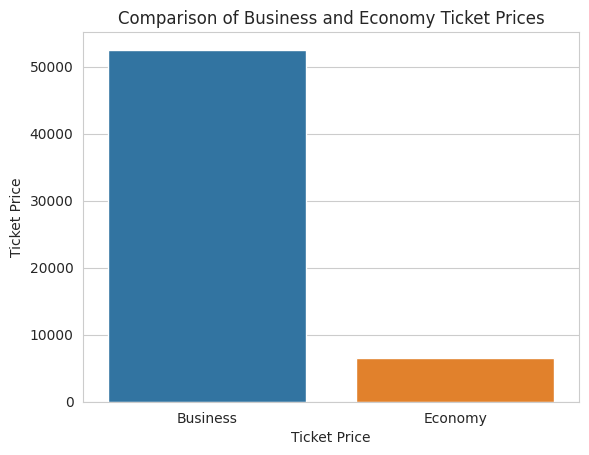

In [ ]:
# Vẽ biểu đồ cột từ dữ liệu của class_df theo Journey Class
sns.barplot(data=class_df, x='Journey Class', y=0)
plt.xlabel('Ticket Price')
plt.title('Comparison of Business and Economy Ticket Prices')
plt.ylabel("Ticket Price")
plt.show()

Vé Hạng Thương gia thường đắt hơn vé Hạng Phổ thông. Điều này là do các tiện nghi và đặc quyền bổ sung đi kèm với Hạng Thương gia, chẳng hạn như nhiều chỗ để chân hơn, thức ăn ngon hơn và ưu tiên lên máy bay.

Tuy nhiên, vé Hạng Phổ thông đắt nhất từ Chennai đến Kolkata có giá khổng lồ 42349, cao hơn một số vé Hạng Thương gia cho các tuyến khác.

Mặt khác, vé Hạng Thương gia rẻ nhất cho chặng bay từ Bangalore đến Hyderabad chỉ có giá là 12000, thấp hơn đáng kể so với giá vé hạng Thương gia trung bình. Hiện tượng này có thể là do các yếu tố hậu cần và thị trường, chẳng hạn như sự cạnh tranh giữa các hãng hàng không và nhu cầu đối với các tuyến đường nhất định.

Ngoài ra, Air India dường như cung cấp cả vé hạng phổ thông đắt nhất và vé hạng thương gia rẻ nhất. Không có gì lạ khi các hãng hàng không có một số thay đổi về giá của họ và có thể chiến lược giá của Air India bao gồm việc cung cấp cả vé hạng cao vé phổ thông có giá và vé thương gia có giá thấp. Có thể có một số lý do cho chiến lược giá này. Ví dụ: Air India có thể đang cố gắng thu hút nhiều khách hàng hơn đến ghế hạng thương gia của mình bằng cách cung cấp cho họ mức giá thấp hơn. Đồng thời, hãng hàng không có thể đang tìm cách tối đa hóa doanh thu bằng cách tính phí bảo hiểm cho các vé hạng phổ thông đắt nhất của mình. Cũng có thể những thay đổi về giá này là kết quả của các yếu tố cung và cầu, chẳng hạn như tình trạng còn chỗ trên các chuyến bay cụ thể hoặc mức độ phổ biến của một số tuyến bay nhất định. Nhìn chung, thật khó để nói chắc chắn tại sao Air India lại cung cấp cả vé hạng phổ thông giá cao và vé hạng thương gia giá rẻ mà không có thêm thông tin về chiến lược giá và các yếu tố thị trường của họ.

Nhìn chung, trong khi chênh lệch giá giữa vé Hạng Thương gia và Hạng Phổ thông có thể là xu hướng chung, vẫn có thể có những ngoại lệ đáng chú ý đáng để khám phá và tìm hiểu trong bối cảnh của ngành hàng không.

####**Đồ thị thể hiện giá vé với các thông số khác nhau theo từng class

Xác định chức năng plot để vẽ các đồ thị khác nhau

In [ ]:
def plot_flight_prices(data, x_col, y_col, hue_col, palette, title, layout):
    # Sắp xếp DataFrame chứa các chuyến bay Business theo thứ tự thời gian khởi hành
    business_flights_sorted = business_flights.sort_values(x_col)
    # Sắp xếp DataFrame chứa các chuyến bay Economy theo thứ tự thời gian khởi hành
    economy_flights_sorted = economy_flights.sort_values(x_col)
    # Thiết lập figure với hai subplot
    if (layout =='H'):
        fig, axs = plt.subplots(1, 2, figsize=(20, 7))
    else:
        fig, axs = plt.subplots(2, 1, figsize=(15, 15))

    # Vẽ biểu đồ phân phối giá vé theo các thời gian khởi hành khác nhau cho chuyến bay Business
    sns.lineplot(data=business_flights_sorted, x=x_col, y=y_col, hue=hue_col, ax=axs[0], palette=palette)
    axs[0].set_title('Business Flights', fontsize =14)
    axs[0].get_legend().remove()
    axs[0].grid(color='lightgrey', linestyle='--', linewidth=0.9)

    # Vẽ biểu đồ phân phối giá vé theo các thời gian khởi hành khác nhau cho chuyến bay Economy
    sns.lineplot(data=economy_flights_sorted, x=x_col, y=y_col, hue=hue_col, ax=axs[1], palette=palette)
    axs[1].set_title('Economy Flights', fontsize =14)
    axs[1].get_legend().remove()
    axs[1].grid(color='lightgrey', linestyle='--', linewidth=0.9)

    # Vẽ legend chung cho cả hai biểu đồ ở vị trí right center
    handles, labels = axs[1].get_legend_handles_labels()
    unique_labels = list(set(labels))
    unique_handles = [handles[labels.index(label)] for label in unique_labels]
    fig.legend(unique_handles, unique_labels,loc='center right', bbox_to_anchor=(1.0, 0.5), fancybox= True)

    # Đặt tiêu đề cho figure
    fig.suptitle(title, fontsize =18)
    plt.grid(color = 'lightgrey', linestyle = '--', linewidth = 0.9)
    plt.show()

Đồ thị Flight Prices dựa trên Departure Time

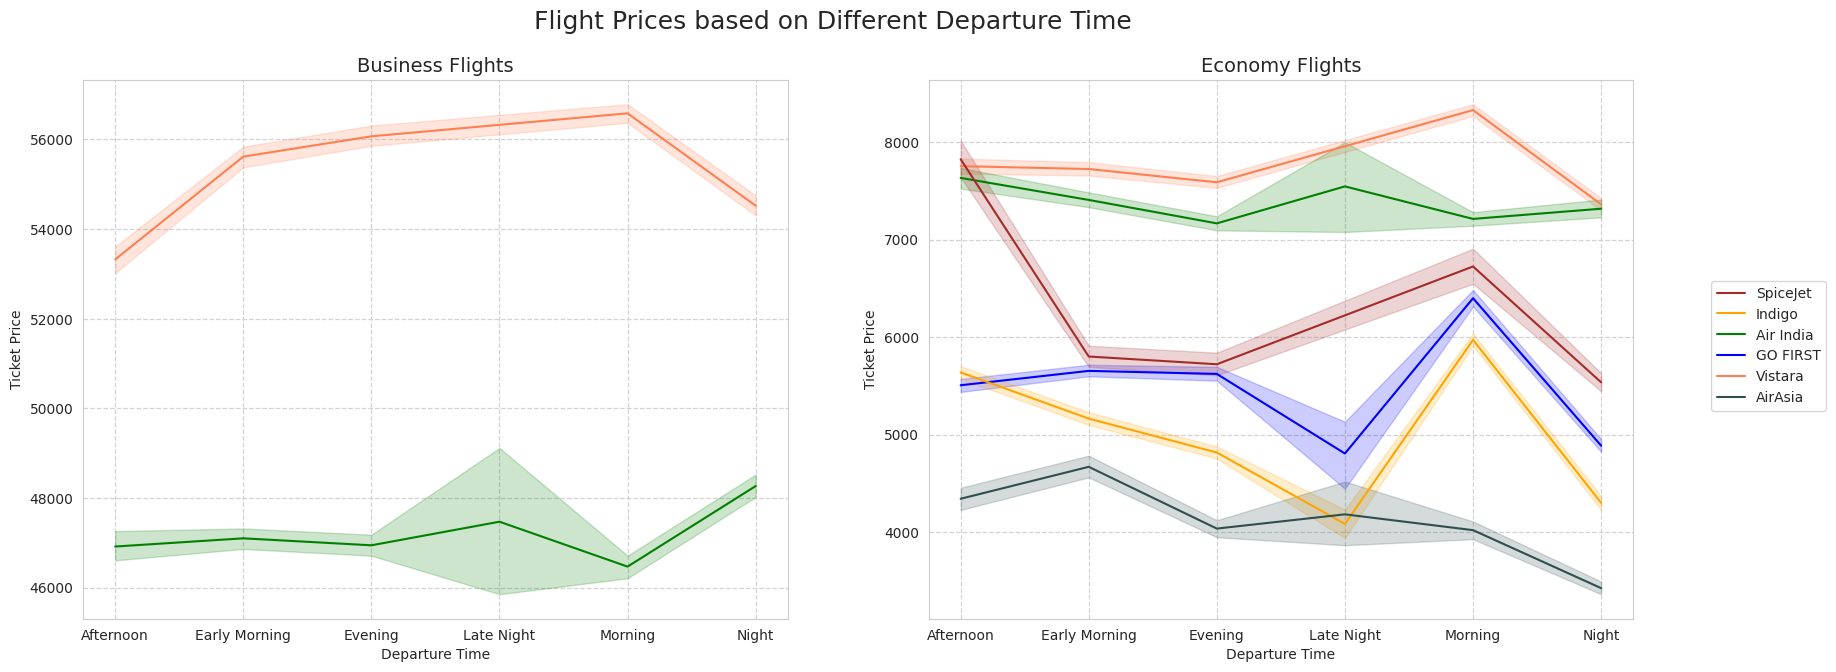

In [ ]:
# Vẽ đồ thị Flight Prices dựa trên Departure Time
plot_flight_prices(df, 'Departure Time', 'Ticket Price', 'Airline',
                   airline_colors, 'Flight Prices based on Different Departure Time', 'H')

Đồ thị Flight Prices dựa trên Source City

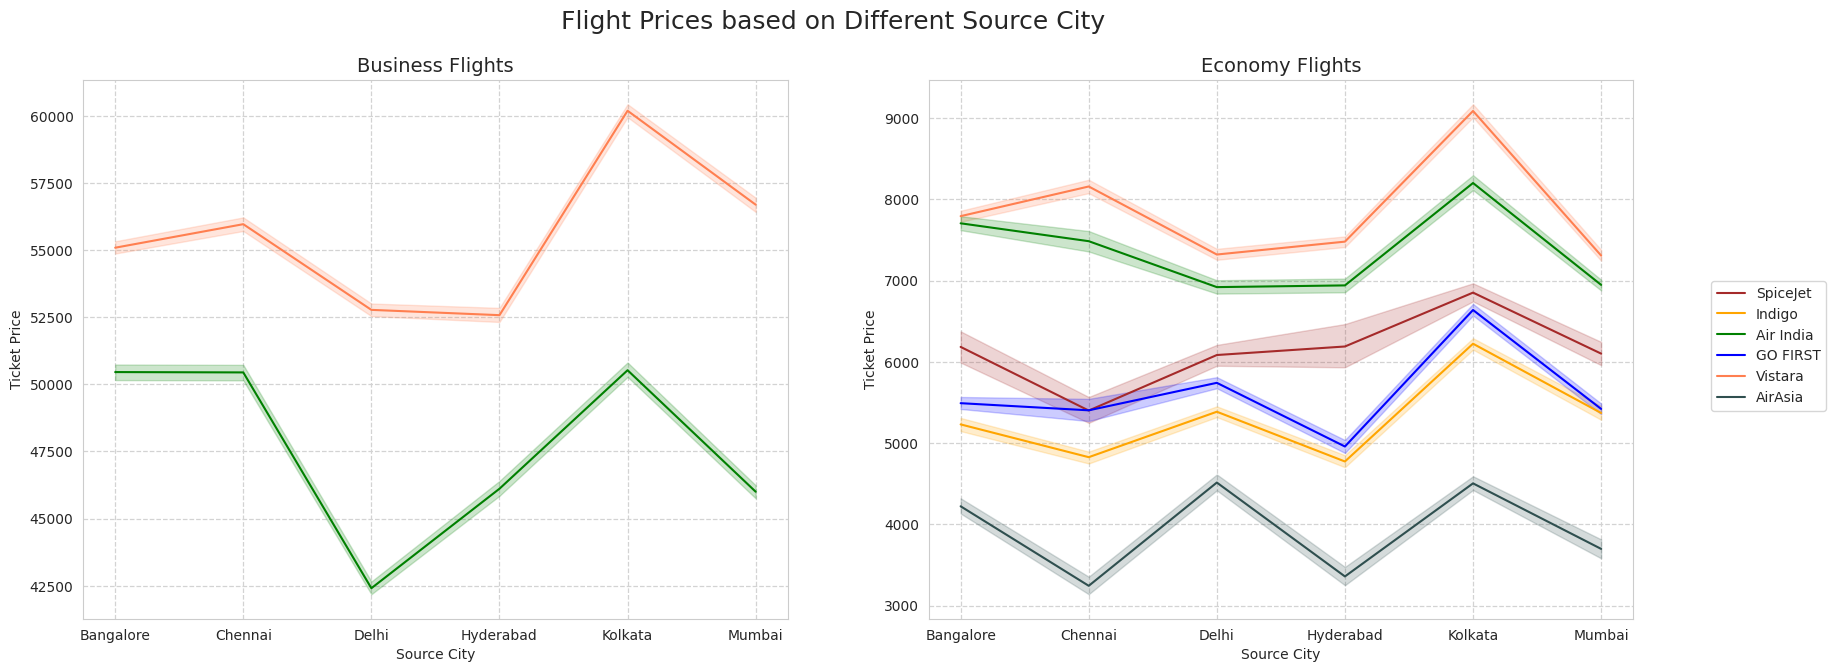

In [ ]:
# Vẽ đồ thị Flight Prices dựa trên Source City
plot_flight_prices(df, 'Source City', 'Ticket Price', 'Airline',
                   airline_colors, 'Flight Prices based on Different Source City', 'H')

Đồ thị Flight Prices dựa trên Destination City

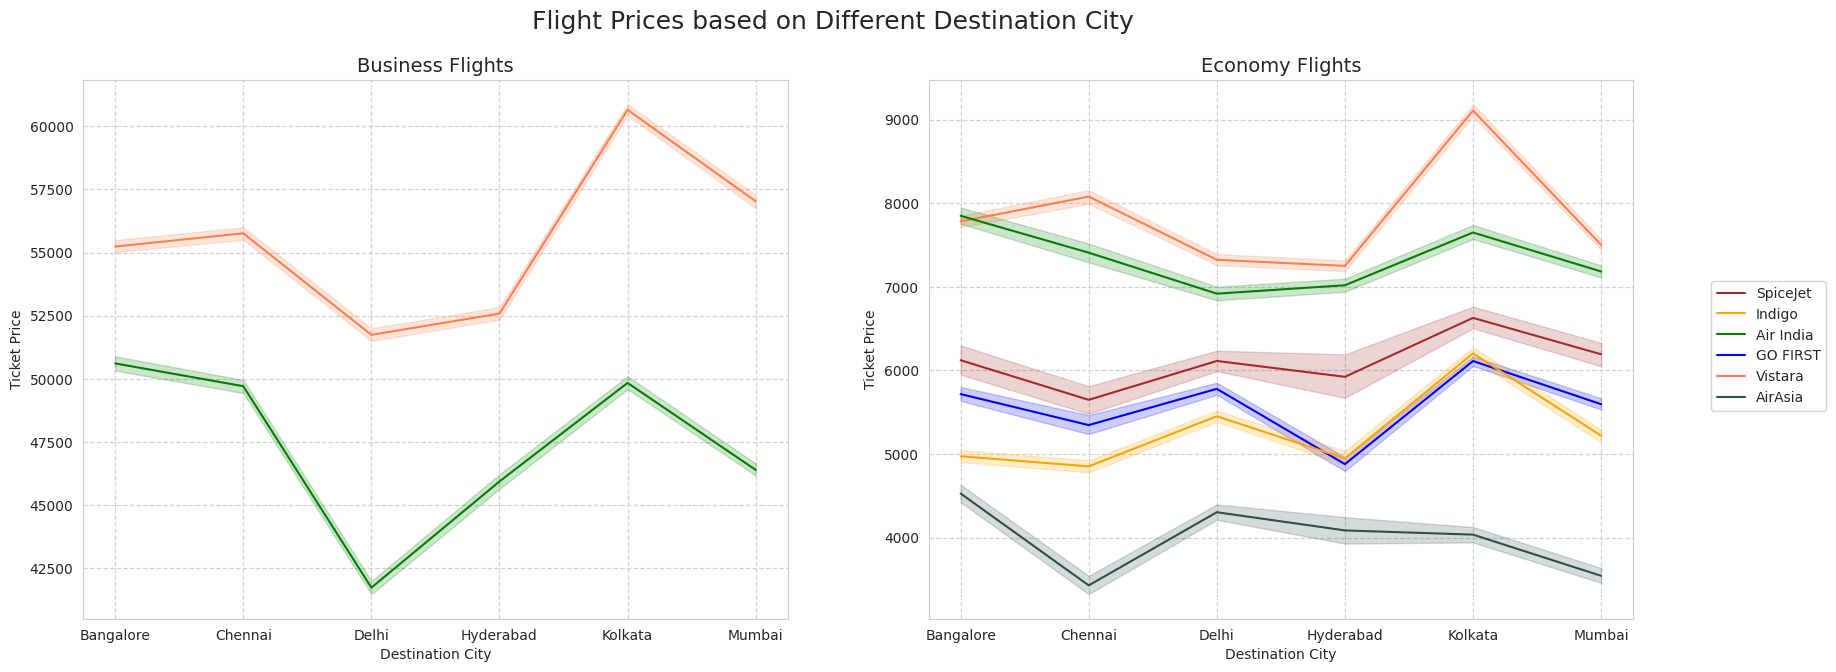

In [ ]:
# Vẽ đồ thị Flight Prices dựa trên Destination City
plot_flight_prices(df, 'Destination City', 'Ticket Price', 'Airline',
                   airline_colors, 'Flight Prices based on Different Destination City', 'H')

Đồ thị Flight Prices dựa trên Number of Stops

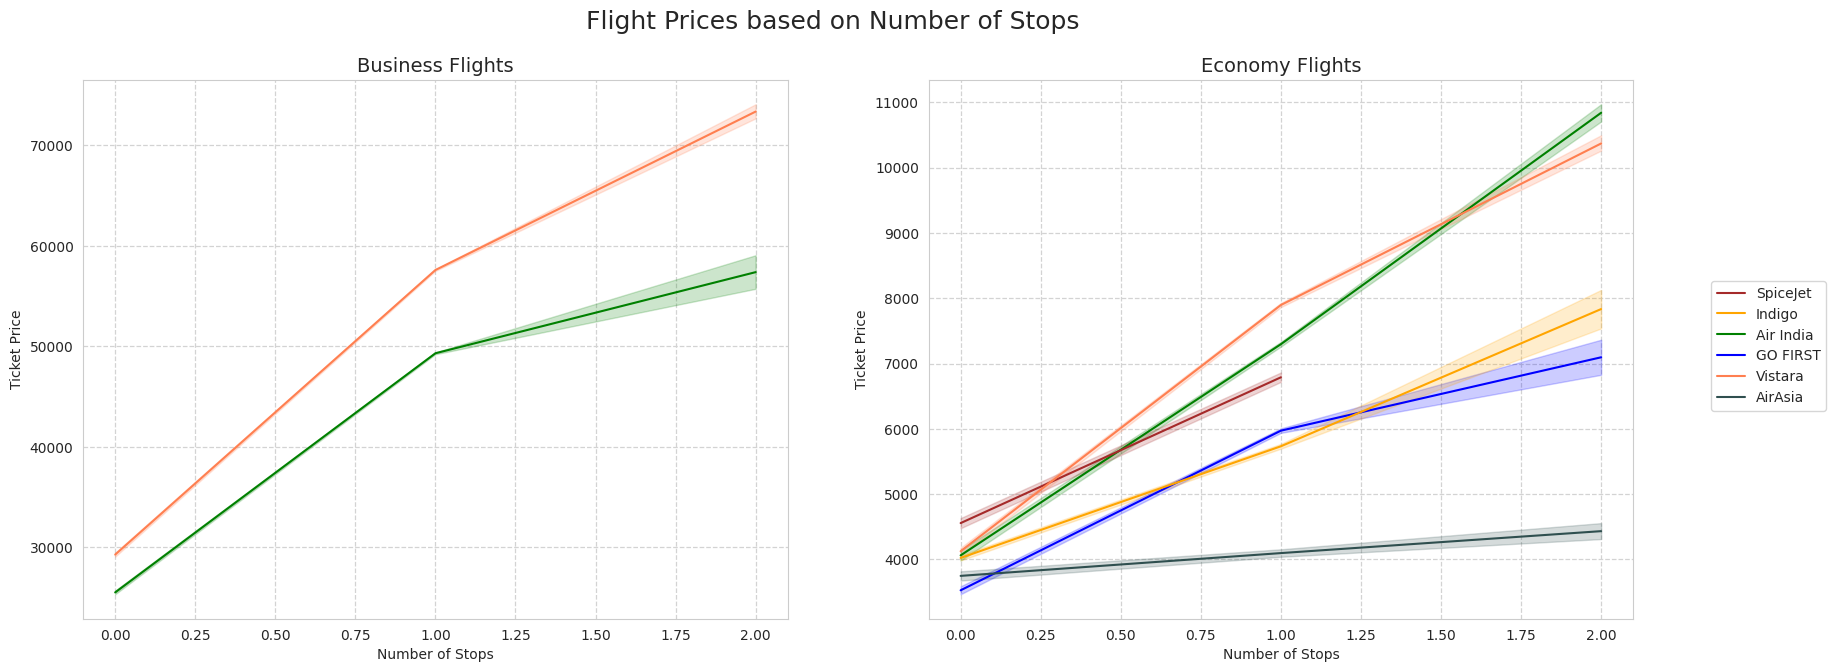

In [ ]:
# Vẽ đồ thị Flight Prices dựa trên Number of Stops
plot_flight_prices(df, 'Number of Stops', 'Ticket Price', 'Airline',
                   airline_colors, 'Flight Prices based on Number of Stops', 'H')

Đồ thị Flight Prices dựa trên Trip Duration

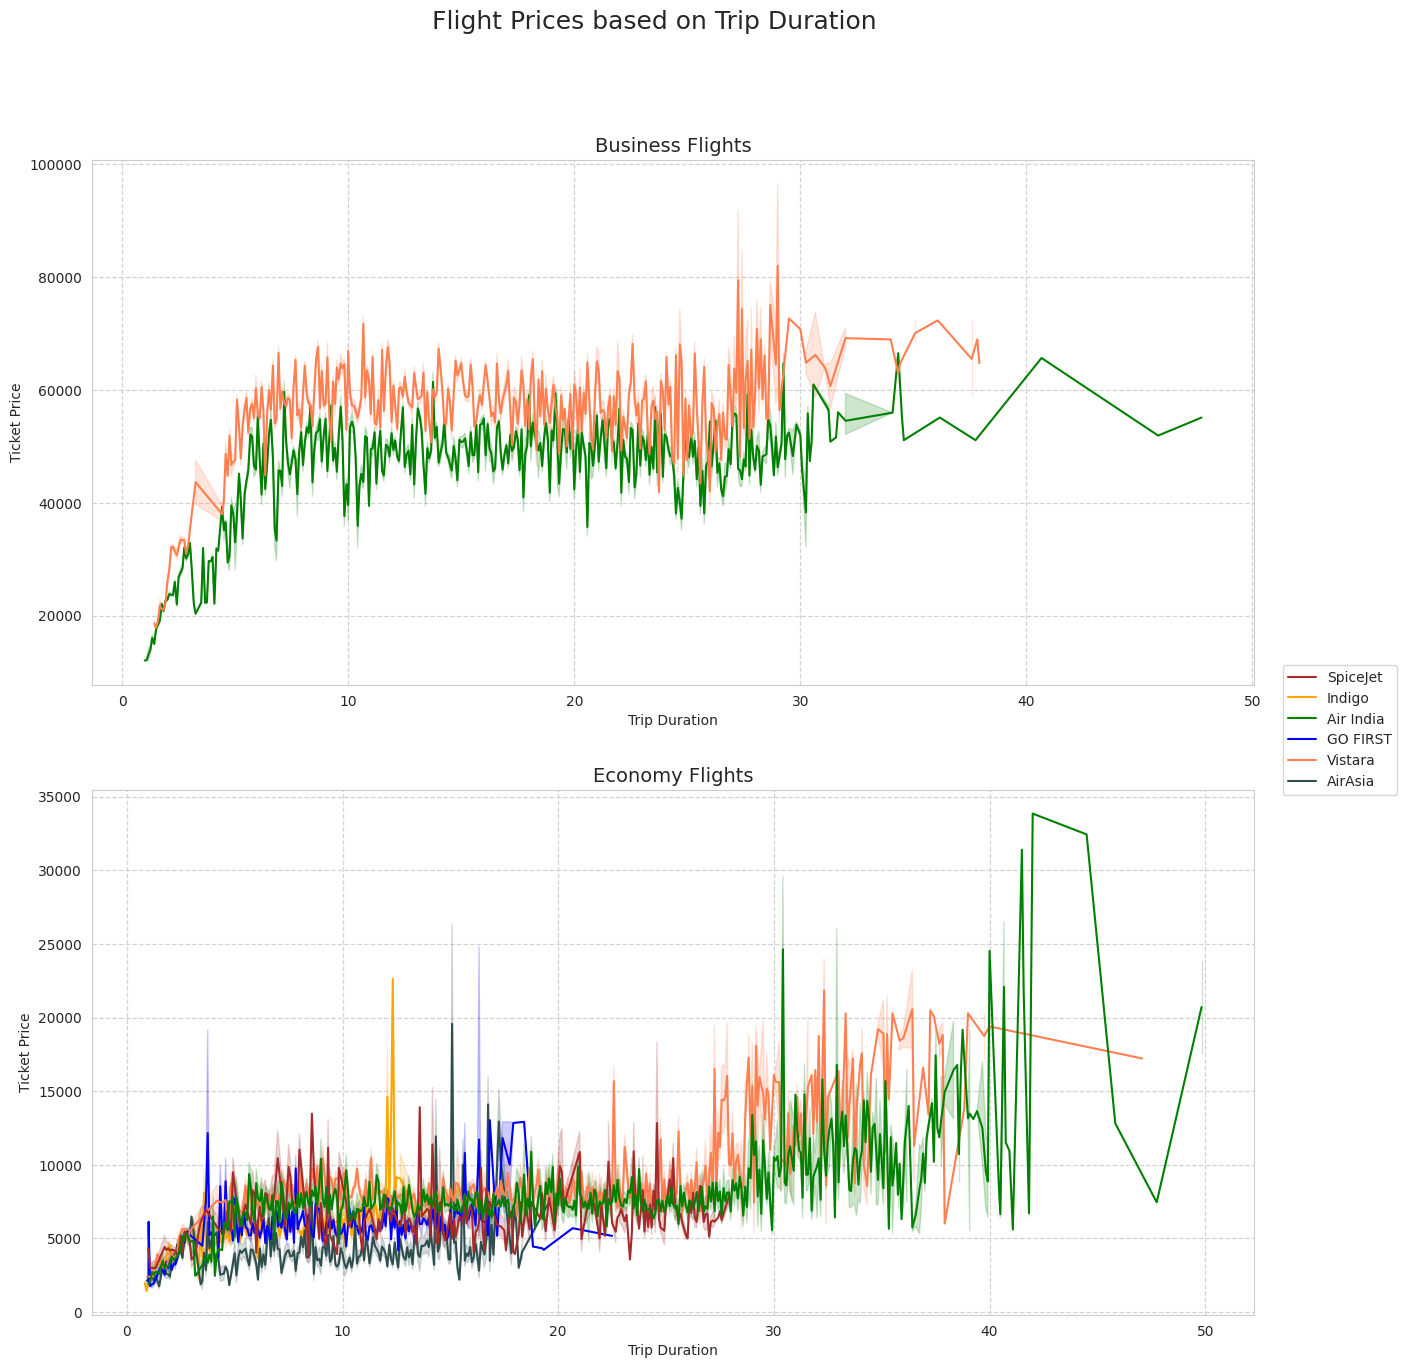

In [ ]:
# Vẽ đồ thị Flight Prices dựa trên Trip Duration
plot_flight_prices(df, 'Trip Duration', 'Ticket Price', 'Airline',
                   airline_colors, 'Flight Prices based on Trip Duration', 'V')

Đồ thị Flight Prices dựa trên Trip Duration

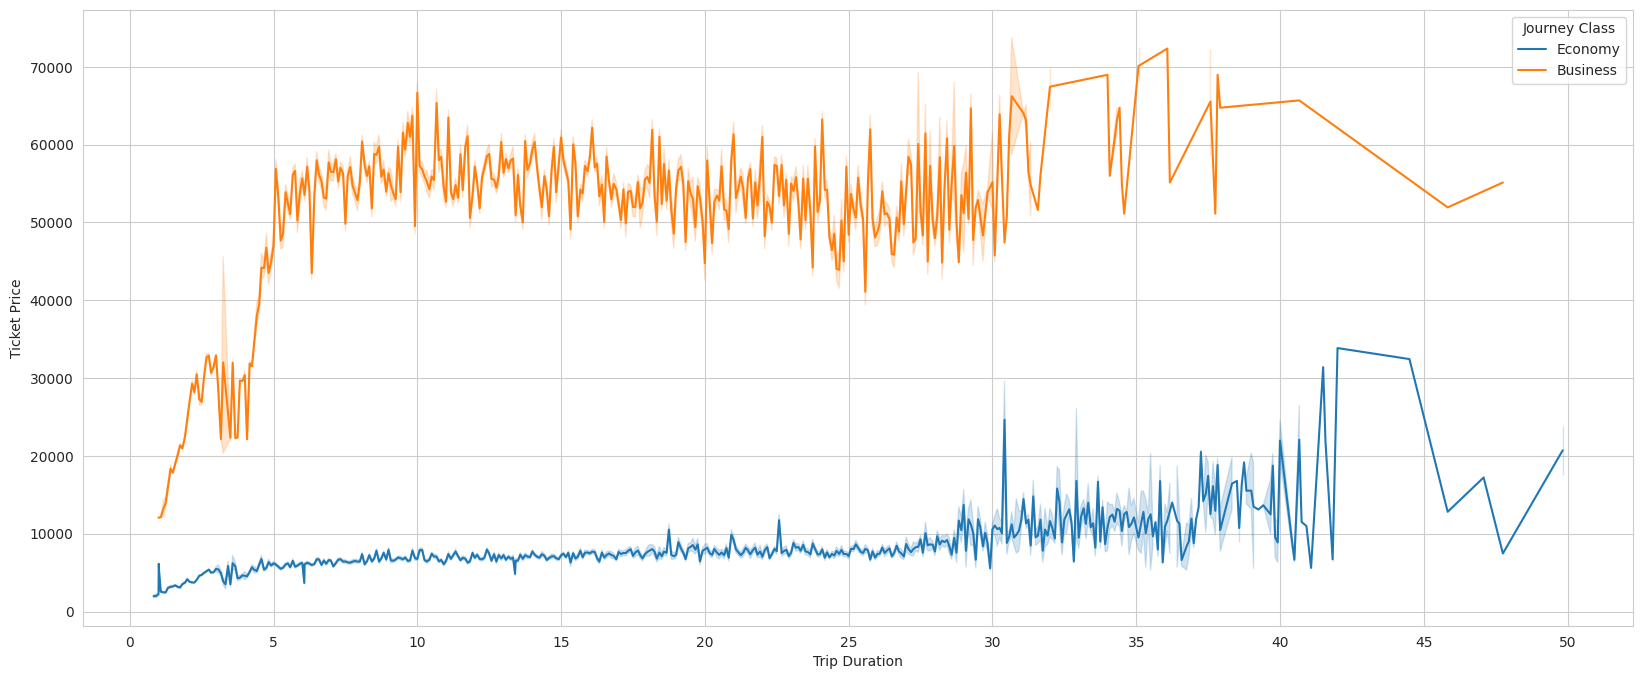

In [ ]:
# Vẽ đồ thị Flight Prices dựa trên Trip Duration
fig = plt.figure(figsize=(20,8))
sns.lineplot(data=df, x='Trip Duration', y='Ticket Price', hue='Journey Class')
plt.xticks(range(0, 52, 5))
plt.show()

Đồ thị Flight Prices dựa trên Day of Week

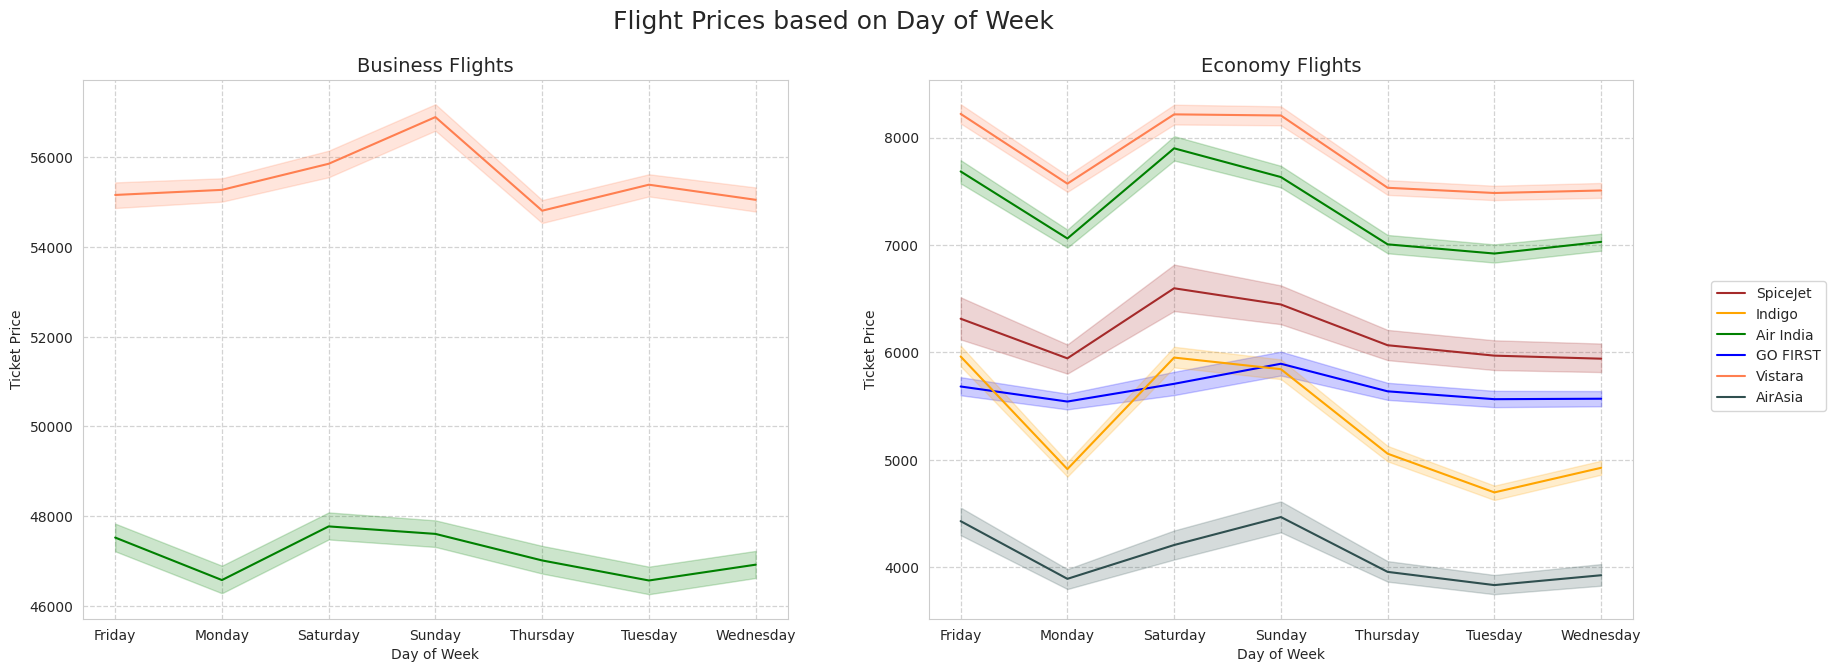

In [ ]:
# Vẽ đồ thị Flight Prices dựa trên Day of Week
plot_flight_prices(df, 'Day of Week', 'Ticket Price', 'Airline',
                   airline_colors, 'Flight Prices based on Day of Week', 'H')

Biểu đồ Violin cho sự thay đổi của Flight Price dựa trên Number of Stops

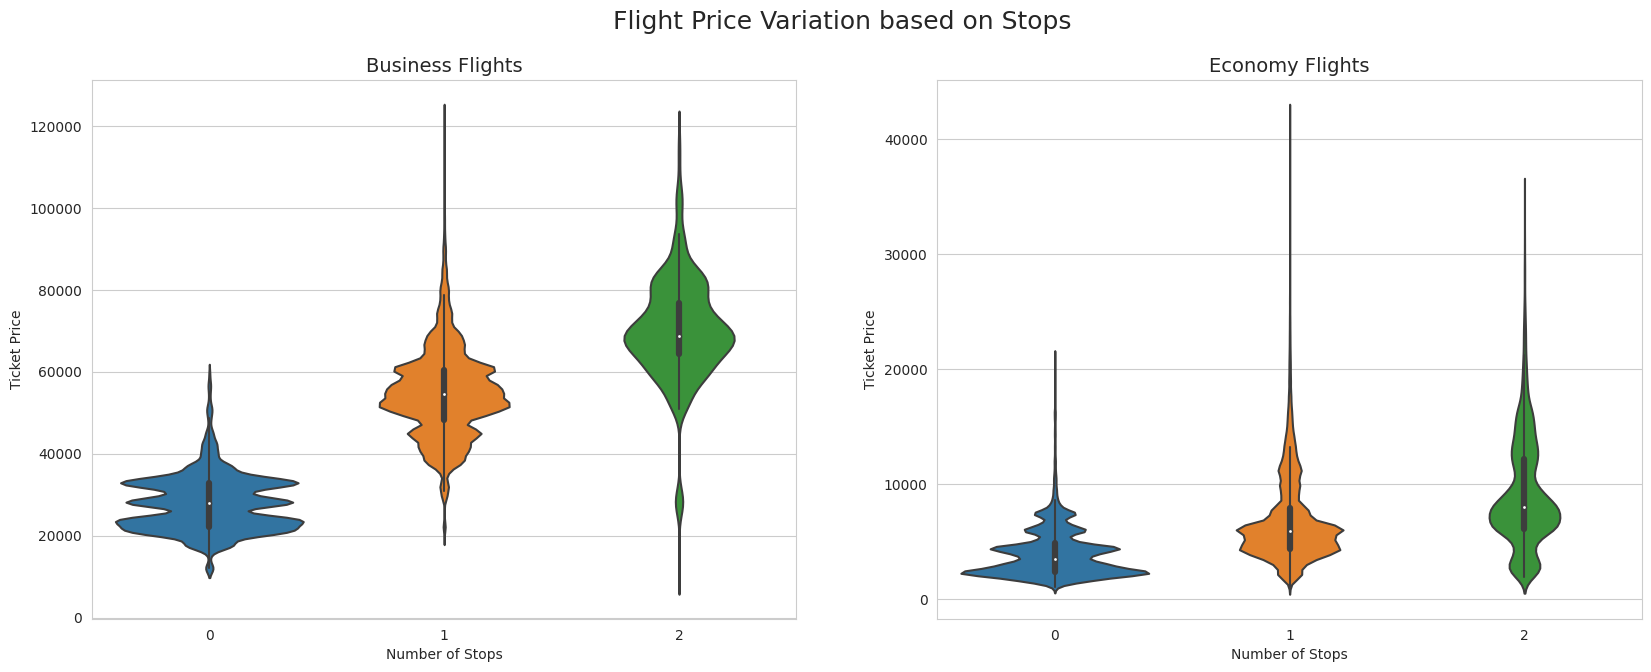

In [ ]:
# Vẽ biểu đồ Violin cho sự thay đổi của Flight Price dựa trên Number of Stops
fig, axs = plt.subplots(1, 2, figsize=(20, 7))

# Biểu đồ cho chuyến bay Business
sns.violinplot(x='Number of Stops', y='Ticket Price', ax=axs[0], data=business_flights)
axs[0].set_title('Business Flights', fontsize =14)

# Biểu đồ cho chuyến bay Economy
sns.violinplot(x='Number of Stops', y='Ticket Price', ax=axs[1], data=economy_flights)
axs[1].set_title('Economy Flights', fontsize =14)

fig.suptitle('Flight Price Variation based on Stops', fontsize =18)
plt.show()

Đồ thị Flight Prices dựa trên Days left

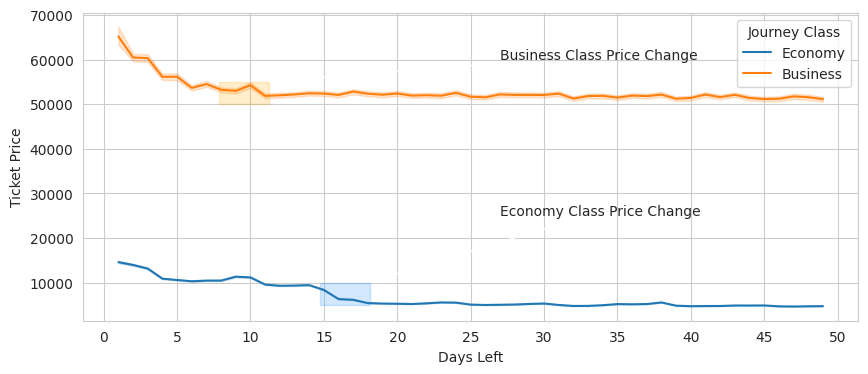

In [ ]:
# Vẽ đồ thị Flight Prices dựa trên Days left
fig = plt.figure(figsize=(10,4))
sns.lineplot(data=df, x='Days Left', y='Ticket Price', hue='Journey Class')
plt.xticks(range(0, 52, 5))

# Vùng có màu nền biểu diễn sự biến đổi giá vé chuyến bay Economy
plt.axhspan(5000, 10000, 0.305, 0.37, alpha=0.2, color='dodgerblue')

# Thêm nhãn cho vùng có màu nền
plt.annotate('Economy Class Price Change', xy=(18, 10000), xytext=(27, 25000),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Business Class Price Change', xy=(11, 55000), xytext=(27, 60000),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Vùng có màu nền biểu diễn sự biến đổi giá vé chuyến bay Business
plt.axhspan(50000, 55000, 0.175, 0.24, alpha=0.2, color='orange')
plt.show()

####**Đồ thị T-Test thể hiện sự thay đổi của Giá vé phụ thuộc vào Thời gian khởi hành ( Departure Time ) và Thời gian đến ( Arrival Time )

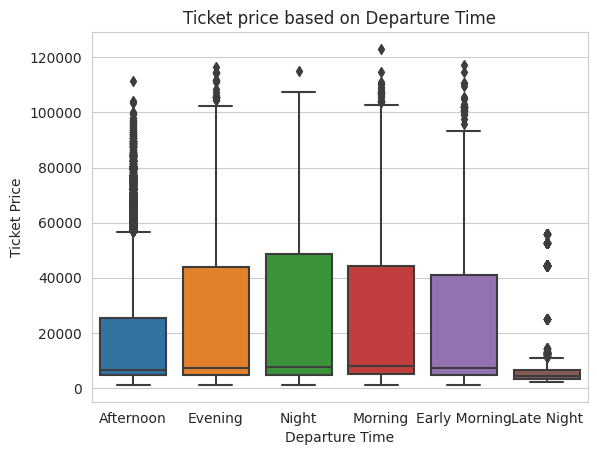

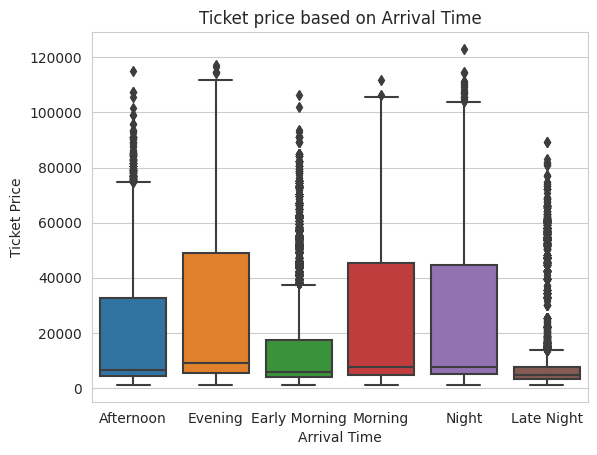

T-Statistic: 31.98, P-Value: 0.0000


In [ ]:
# Chuẩn bị dữ liệu
df_temp = df[['Departure Time', 'Arrival Time', 'Ticket Price']]

# Trực quan hóa
fig1 = sns.boxplot(x='Departure Time', y='Ticket Price', data=df)
plt.title('Ticket price based on Departure Time')
plt.show()

fig2 = sns.boxplot(x='Arrival Time', y='Ticket Price', data=df)
plt.title('Ticket price based on Arrival Time')
plt.show()

# Phân tích thống kê
night_prices = df_temp[df_temp['Departure Time'] == 'Night']['Ticket Price']
early_morning_prices = df_temp[df_temp['Arrival Time'] == 'Early Morning']['Ticket Price']
t_statistic, p_value = ttest_ind(night_prices, early_morning_prices)

print('T-Statistic: {:.2f}, P-Value: {:.4f}'.format(t_statistic, p_value))

Theo dự kiến, khởi hành vào ban đêm hoặc đến vào ban đêm vẫn là cách rẻ nhất để đi du lịch. Nhưng cũng có thể thấy là đến sáng sớm cũng rẻ và bay chiều rẻ hơn một chút là bay chiều, sáng và tối.

####**Đồ thị thể hiện sự ảnh hướng của số điểm dừng của từng hãng hàng không đến giá vé

Text(0.5, 1.0, 'Airline prices based on the number of stops  for business')

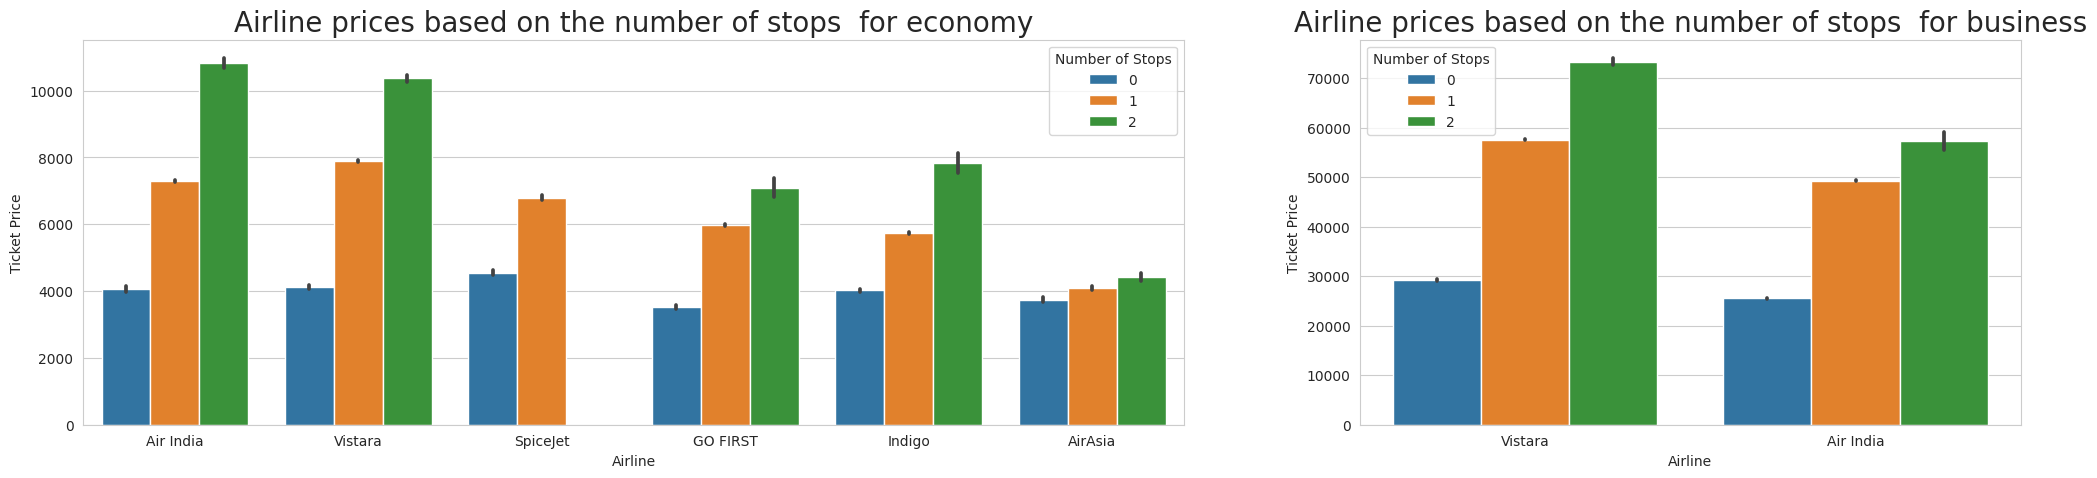

In [ ]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
# Vẽ đồ thị cột thể hiện sự ảnh hướng của số điểm dừng của từng hãng hàng không đến giá vé Phổ thông ( Economy )
sns.barplot(y = "Ticket Price", x = "Airline",hue="Number of Stops",data = df.loc[df["Journey Class"]=='Economy'].sort_values("Ticket Price", ascending = False), ax=axs[0])
axs[0].set_title("Airline prices based on the number of stops  for economy",fontsize=20)

# Vẽ đồ thị cột thể hiện sự ảnh hướng của số điểm dừng của từng hãng hàng không đến giá vé Thương gia ( Business )
sns.barplot(y = "Ticket Price", x = "Airline",hue="Number of Stops",data = df.loc[df["Journey Class"]=='Business'].sort_values("Ticket Price", ascending = False), ax=axs[1])
axs[1].set_title("Airline prices based on the number of stops  for business",fontsize=20)

Rõ ràng là càng có nhiều điểm dừng thì chuyến bay càng đắt, ngoại trừ AirAsia nơi giá dường như không đổi. Hành vi và phân tích khác nhau của AirAsia có xu hướng cho thấy rằng nó liên quan đến một công ty chi phí thấp.

####**Đồ thị thể hiện sự ảnh hưởng của thời gian bay đến giá vé - Mean/ Min/ Max Price

In [ ]:
# Tạo các khoảng (bins) cho cột "Trip Duration" của DataFrame
bins = np.linspace(start=df['Trip Duration'].min(), stop=df['Trip Duration'].max(), num=4)
# Gán nhãn cho các khoảng
labels = ['short', 'moderate', 'long']
# Gán nhãn cho cột "Trip Duration" bằng các khoảng đã tạo trước đó
df['Trip Duration'] = pd.cut(df['Trip Duration'], bins=bins, labels=labels, include_lowest=True)
# Đếm số lượng giá trị trong mỗi nhãn
df['Trip Duration'].value_counts()

short       234301
moderate     64965
long           893
Name: Trip Duration, dtype: int64

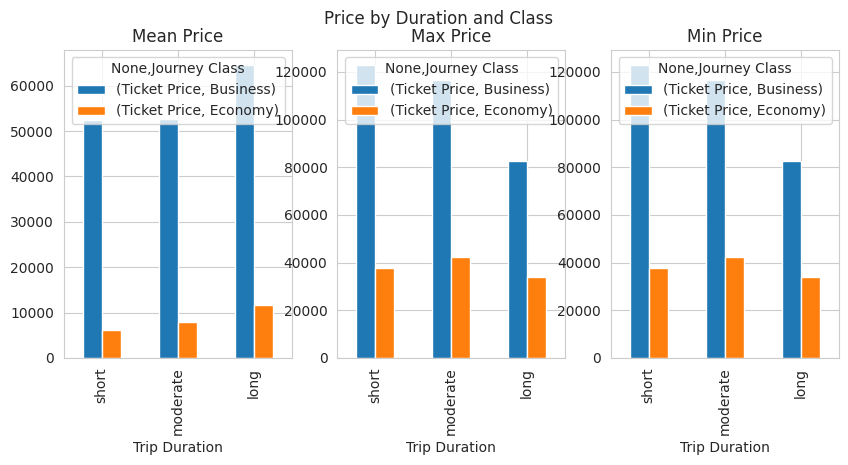

In [ ]:
# Xử lý dữ liệu tạo ra các df Mean/ Max/ Min Price
mean_duration = df.groupby(['Trip Duration', 'Journey Class'])['Ticket Price'].mean().to_frame()
max_duration = df.groupby(['Trip Duration', 'Journey Class'])['Ticket Price'].max().to_frame()
min_duration = df.groupby(['Trip Duration', 'Journey Class'])['Ticket Price'].max().to_frame()

# Vẽ biểu đồ cột hiển thị giá trị trung bình, giá trị lớn nhất và giá trị nhỏ nhất của cột "Ticket Price" dựa trên các nhóm "Trip Duration" và "Journey Class".
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
mean_duration.unstack().plot(kind='bar', ax=axs[0], title='Mean Price')
max_duration.unstack().plot(kind='bar', ax=axs[1], title='Max Price')
min_duration.unstack().plot(kind='bar', ax=axs[2], title='Min Price')
plt.suptitle('Price by Duration and Class')
plt.show()

Trung bình, các chuyến bay có thời gian dài hơn có xu hướng đắt hơn các chuyến bay có thời gian vừa phải hoặc ngắn ngày, bất kể đó là hạng phổ thông hay hạng thương gia. Tuy nhiên, đối với các hành khách hạng phổ thông, các chuyến bay chặng ngắn có giá vé đắt hơn một cách đáng ngạc nhiên so với các chuyến bay chặng dài. Mặt khác, đối với hạng thương gia, các chuyến bay có khoảng cách vừa phải thường có giá vé đắt hơn. Nhìn chung, những kết quả này cho thấy rằng thời lượng chuyến bay thực sự có tác động đến giá vé và điều quan trọng là phải xem xét yếu tố này khi lên kế hoạch cho một chuyến đi.

####**Đồ thị thể hiện sự ảnh hưởng của số điểm dừng đến giá vé - Mean/ Min/ Max Price

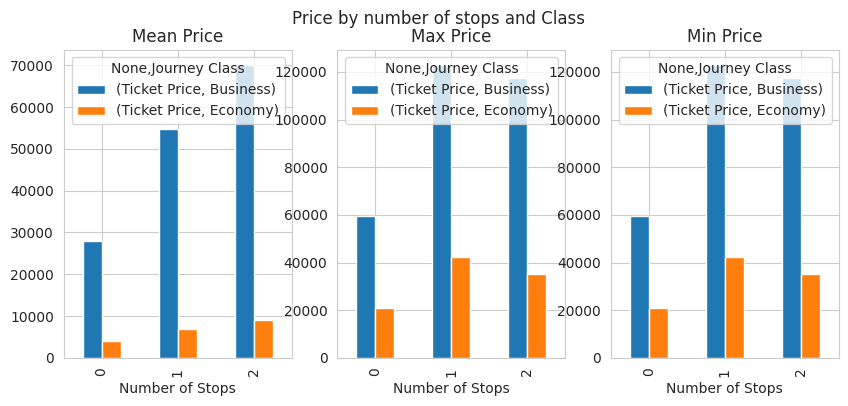

In [ ]:
# Xử lý dữ liệu tạo ra các df Mean/ Max/ Min Price
mean_stops = df.groupby(['Number of Stops', 'Journey Class'])['Ticket Price'].mean().to_frame()
max_stops = df.groupby(['Number of Stops', 'Journey Class'])['Ticket Price'].max().to_frame()
min_stops = df.groupby(['Number of Stops', 'Journey Class'])['Ticket Price'].max().to_frame()

# Vẽ biểu đồ cột hiển thị giá trị trung bình, giá trị lớn nhất và giá trị nhỏ nhất của cột "Ticket Price" dựa trên nhóm "Number of Stops"
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
mean_stops.unstack().plot(kind='bar', ax=axs[0], title='Mean Price')
max_stops.unstack().plot(kind='bar', ax=axs[1], title='Max Price')
min_stops.unstack().plot(kind='bar', ax=axs[2], title='Min Price')
plt.suptitle('Price by number of stops and Class')
plt.show()

Khi phân tích tác động của thời gian bay đến giá vé, cho thấy các chuyến bay có hai điểm dừng trở lên có mức giá trung bình cao nhất, tiếp theo là các chuyến bay một điểm dừng và các chuyến bay thẳng. Tuy nhiên, các chuyến bay một điểm dừng có giá vé tối đa cao nhất, trong khi các chuyến bay hai điểm dừng trở lên và các chuyến bay thẳng có giá tối đa thấp hơn. Mặt khác, các chuyến bay thẳng có mức giá tối thiểu thấp nhất, trong khi các chuyến bay một điểm dừng và hai điểm dừng trở lên có mức giá tối thiểu cao hơn. Quan sát cả hạng phổ thông và hạng thương gia, cho thấy một mô hình thống nhất. Nhìn chung, thời lượng chuyến bay đóng một vai trò quan trọng trong việc xác định giá vé, với các chuyến bay dài hơn thường có giá cao hơn, đặc biệt là khi có thêm các điểm dừng.

####**Matix tương quan của các cột số

<ipython-input-54-8fb151cb18df>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


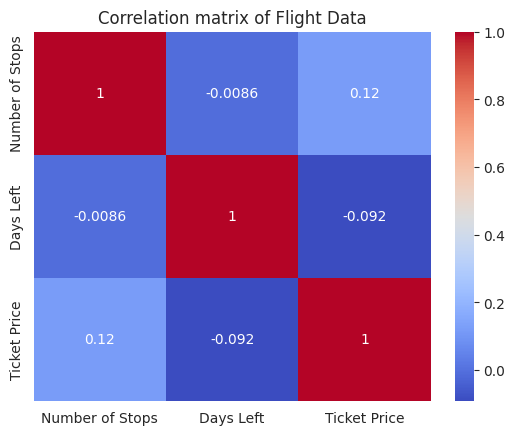

In [ ]:
corr = df.corr()
# Trực quan hóa ma trận tương quan bằng bản đồ heatmap
fig = sns.heatmap(corr, annot=True, cmap='coolwarm').get_figure()
plt.title('Correlation matrix of Flight Data')
plt.show()

####**Đồ thị tổng quan thể hiện sự ảnh hưởng của các biến giá trị đến Giá vé

In [ ]:
def preprocessing(df):
    # Mã hóa biến thứ tự "stops" và "class".
    df["Number of Stops"] = df["Number of Stops"].replace({'zero':0,'one':1,'two_or_more':2}).astype(int)
    df["Journey Class"] = df["Journey Class"].replace({'Economy':0,'Business':1}).astype(int)

    # Tạo các biến giả (dummy variables) cho các thành phố, thời gian khởi hành và hãng hàng không.
    dummies_variables = ["Airline","Source City","Destination City","Departure Time","Arrival Time"]
    dummies = pd.get_dummies(df[dummies_variables], drop_first= True)
    df = pd.concat([df,dummies],axis=1)

    # Xóa các cột gốc của thành phố, thời gian khởi hành và hãng hàng không.
    df = df.drop(["Airline","Source City","Destination City","Departure Time","Arrival Time"],axis=1)

    return df

In [ ]:
df_preprocessed = preprocessing(df)

Vẽ một ma trận tương quan để hình dung tầm quan trọng tuyến tính của từng biến đối với mục tiêu

<ipython-input-57-1dc2cfa5c7f4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df_preprocessed.corr(), dtype=bool))
<ipython-input-57-1dc2cfa5c7f4>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df_preprocessed.corr(), mask=mask,annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'RdBu_r')


<Axes: >

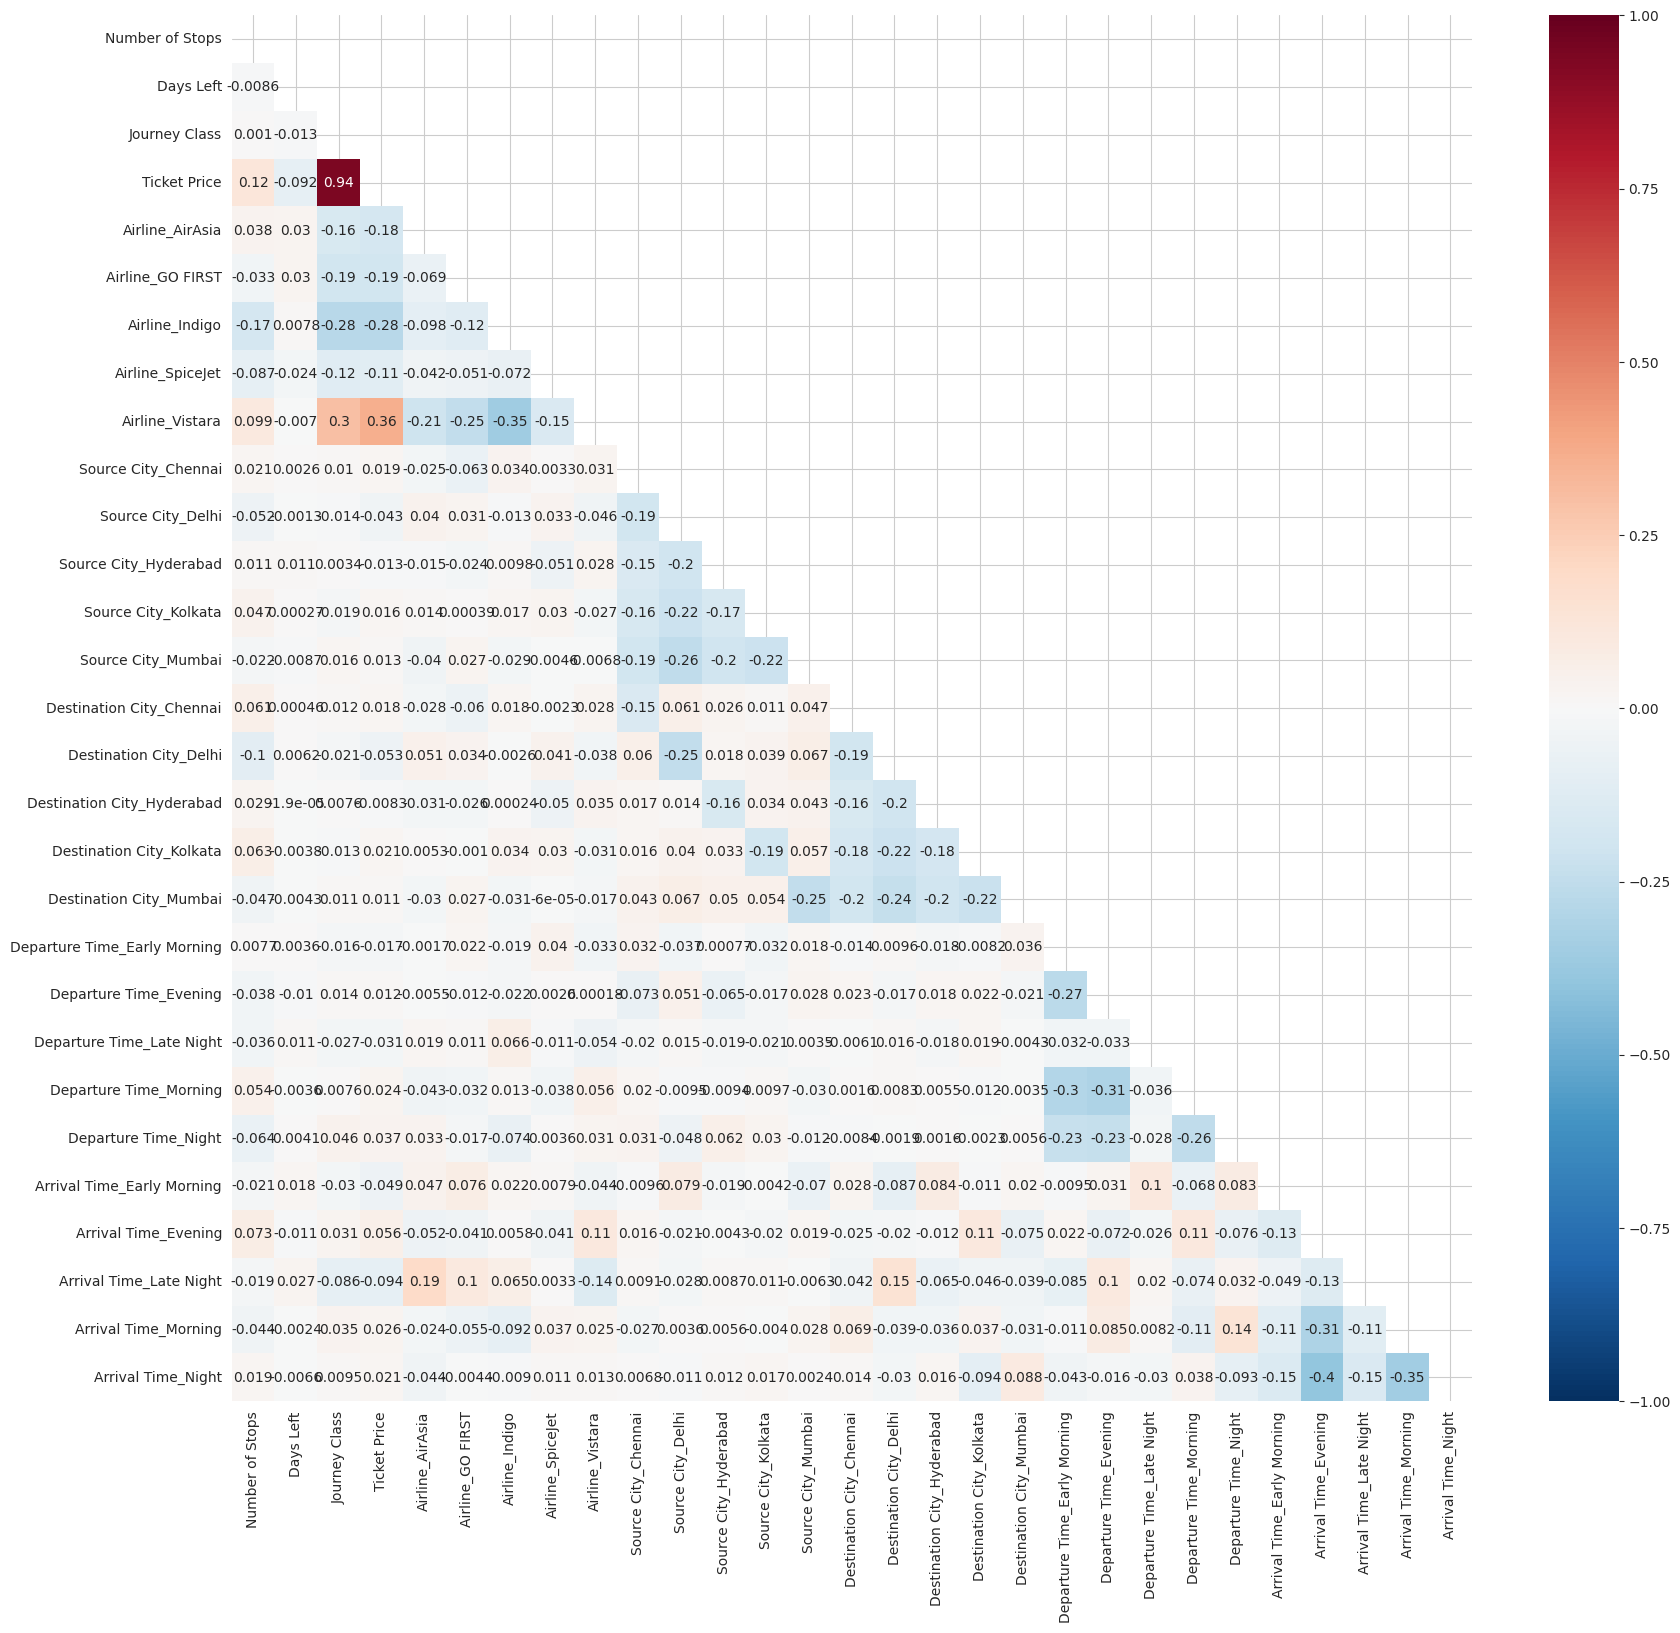

In [ ]:
#  Tạo một ma trận tam giác trên (upper triangular matrix) có kích thước giống với ma trận tương quan của DataFrame
mask = np.triu(np.ones_like(df_preprocessed.corr(), dtype=bool))

# Vẽ biểu đồ heatmap dựa trên ma trận tương quan của DataFrame
plt.figure(figsize = (20,18))
sns.heatmap(data = df_preprocessed.corr(), mask=mask,annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'RdBu_r')

Mặc dù mối tương quan là thước đo tốt cho mối quan hệ tuyến tính nhưng nó không làm nổi bật mối quan hệ phi tuyến tính. Đối với điều đó sử dụng thông tin lẫn nhau sẽ là cách tốt nhất.


In [ ]:
def make_mi_scores(X, y):
    # Tạo một bản sao của df X và mã hóa dữ liệu thành kiểu nguyên
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # Kiểm tra kiểu dữ liệu của tất cả các discrete features
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    # Tính điểm thông tin chung giữa từng biến đầu vào và biến mục tiêu
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    # Lưu kết quả vào một Series pandas được sắp xếp giảm dần
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [ ]:
# Loại bỏ cột "Date of Journey" khỏi DataFrame ( do mi_scores không hỗ trợ kiểu dữ liệu datetime64)
df_preprocessed = df_preprocessed.drop("Date of Journey", axis=1)

In [ ]:
# Tạo một bản sao X của df_preprocessed và tách cột "Ticket Price" ra khỏi X
X = df_preprocessed.copy()
y = X.pop("Ticket Price")

# Tính toán điểm thông tin chung và in danh sách điểm thông tin chung theo thứ tự giảm dần
mi_scores = make_mi_scores(X, y)
print(mi_scores.sort_values(ascending=False))

Flight Code                     3.850856
Route                           2.875318
Journey Class                   0.618091
Airline_Vistara                 0.516824
Days Left                       0.478536
Source City_Delhi               0.431282
Source City_Mumbai              0.430002
Number of Stops                 0.393041
Destination City_Delhi          0.388380
Destination City_Mumbai         0.382529
Source City_Kolkata             0.361224
Source City_Hyderabad           0.347183
Destination City_Kolkata        0.339019
Source City_Chennai             0.326069
Destination City_Hyderabad      0.320925
Destination City_Chennai        0.303621
Airline_Indigo                  0.288296
Airline_GO FIRST                0.202544
Airline_AirAsia                 0.166171
Trip Duration                   0.161702
Arrival Time_Evening            0.129275
Arrival Time_Night              0.109034
Departure Time_Evening          0.104767
Arrival Time_Morning            0.101672
Departure Time_M

####**Kết luận


Nếu muốn tiết kiệm tiền mua vé máy bay, có một số yếu tố cần xem xét trước khi mua hàng. Một trong những yếu tố quan trọng nhất là thời gian của các chuyến bay. Điều đáng chú ý là thời gian trong ngày và ngày trong tuần có thể có tác động đáng kể đến giá vé. Nhìn chung, các chuyến bay khởi hành và đến vào lúc đêm khuya thường rẻ hơn so với những chuyến bay khởi hành và đến vào giờ cao điểm. Đối với các chuyến bay có thời gian hành trình 2-3 giờ không điểm dừng, khởi hành vào đêm khuya và thời gian đến thường là một lựa chọn khả thi. Các chuyến bay này thường khởi hành sau 9 hoặc 10 giờ tối và đến điểm đến vào đầu giờ sáng. Mặc dù các chuyến bay này có thể không thuận tiện nhất về mặt lịch trình, nhưng chúng có thể là một cách tuyệt vời để tiết kiệm tiền mua vé.

Một yếu tố khác cần xem xét khi đặt chuyến bay là số điểm dừng. Trong một số trường hợp, chuyến bay có nhiều điểm dừng hơn có thể rẻ hơn chuyến bay có ít điểm dừng hơn, tùy thuộc vào đường bay và hãng hàng không. Nên thực hiện một số nghiên cứu để tìm ra hãng hàng không nào cung cấp các giao dịch tốt nhất cho tuyến đường đã chọn và họ thường thực hiện bao nhiêu điểm dừng.

Khi nói đến việc tìm kiếm ưu đãi tốt nhất cho vé máy bay, điều quan trọng là phải linh hoạt và cởi mở với các lựa chọn khác nhau. Bằng cách xem xét các yếu tố như thời gian, số điểm dừng và các tùy chọn hãng hàng không, bạn có thể tăng cơ hội tìm được ưu đãi lớn trên chuyến bay tiếp theo.

#Mô hình định giá vé máy bay theo yêu cầu người dùng.

####**Thu thập dữ liệu và Tiền xử lý dữ liệu

In [ ]:
# Đọc tệp cleaned_flight_dataset đã được lưu từ Tiền xử lý
df = pd.read_csv('cleaned_flight_dataset.csv')
# Bỏ các cột không bắt buộc để phân tích
df = df.drop(['Date of Journey', 'Flight Code'], axis=1)
# Tách tập dữ liệu từ Cột cuối cùng
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
# Áp dụng One-Hot Encoding cho các cột phân loại
ct = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(drop='first',handle_unknown='ignore'),
    ['Airline','Source City','Destination City','Journey Class','Departure Time','Arrival Time', 'Day of Week'])
],remainder='passthrough')

# Điều chỉnh và chuyển đổi mô hình với các giá trị được mã hóa
X= ct.fit_transform(X)
X

<300159x35 sparse matrix of type '<class 'numpy.float64'>'
	with 2563450 stored elements in Compressed Sparse Row format>

In [ ]:
# Thay đổi chiều của y để biến đổi vô hướng
y = np.ravel(y).astype('float32').reshape(-1,1)
y = y.reshape(-1,1)

In [ ]:
# Tách tập dữ liệu thành Testing và Training
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Mở rộng dữ liệu trước khi chạy mô hình - StandardScaler
scaler_x = StandardScaler(with_mean=False)
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

scaler_y = StandardScaler(with_mean=False)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(210111, 35)
(90048, 35)
(210111, 1)
(90048, 1)


####**Xây dựng Model

In [ ]:
# Xác định Model Deep Learning
ANN_model = keras.Sequential()
ANN_model.add(Dense(100, input_dim = 35))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.25))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3600      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 150)               15150     
                                                                 
 activation_1 (Activation)   (None, 150)               0         
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 activation_2 (Activation)   (None, 150)               0

####**Training Model

In [ ]:
# Biên dịch mô hình ANN theo Standard Scalar
ANN_model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [ ]:
# Training model ANN
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 20, batch_size = 20)

Epoch 1/20
10506/10506 [==============================] - 34s 3ms/step - loss: 0.0393
Epoch 2/20
10506/10506 [==============================] - 35s 3ms/step - loss: 0.0362
Epoch 3/20
10506/10506 [==============================] - 35s 3ms/step - loss: 0.0348
Epoch 4/20
10506/10506 [==============================] - 34s 3ms/step - loss: 0.0336
Epoch 5/20
10506/10506 [==============================] - 34s 3ms/step - loss: 0.0327
Epoch 6/20
10506/10506 [==============================] - 35s 3ms/step - loss: 0.0322
Epoch 7/20
10506/10506 [==============================] - 36s 3ms/step - loss: 0.0315
Epoch 8/20
10506/10506 [==============================] - 34s 3ms/step - loss: 0.0310
Epoch 9/20
10506/10506 [==============================] - 35s 3ms/step - loss: 0.0306
Epoch 10/20
10506/10506 [==============================] - 35s 3ms/step - loss: 0.0303
Epoch 11/20
10506/10506 [==============================] - 37s 3ms/step - loss: 0.0299
Epoch 12/20
10506/10506 [===========================

In [ ]:
# Đánh giá hiệu suất của model
result = ANN_model.evaluate(X_test, y_test)
# Độ chính xác của model
accuracy_ANN = 1 - result

2814/2814 [==============================] - 6s 2ms/step - loss: 0.0380


In [ ]:
print(f"Accuracy: {round((accuracy_ANN)*100, 3)}%")

Accuracy: 96.201%


In [ ]:
# Mở rộng dữ liệu trước khi chạy mô hình - MaxAbsScaler
minmax_x = MaxAbsScaler()
X_train_m = minmax_x.fit_transform(X_train)
X_test_m = minmax_x.transform(X_test)

minmax_y = MaxAbsScaler()
y_train_m = minmax_y.fit_transform(y_train)
y_test_m = minmax_y.transform(y_test)

print(X_train_m.shape)
print(X_test_m.shape)
print(y_train_m.shape)
print(y_test_m.shape)

(210111, 35)
(90048, 35)
(210111, 1)
(90048, 1)


In [ ]:
# Biên dịch mô hình ANN theo MaxAbsScaler
epochs_hist_m = ANN_model.fit(X_train_m, y_train_m, epochs = 20, batch_size = 20)

Epoch 1/20
10506/10506 [==============================] - 34s 3ms/step - loss: 0.0010
Epoch 2/20
10506/10506 [==============================] - 34s 3ms/step - loss: 0.0010
Epoch 3/20
10506/10506 [==============================] - 36s 3ms/step - loss: 0.0010
Epoch 4/20
10506/10506 [==============================] - 34s 3ms/step - loss: 0.0010
Epoch 5/20
10506/10506 [==============================] - 34s 3ms/step - loss: 9.9634e-04
Epoch 6/20
10506/10506 [==============================] - 35s 3ms/step - loss: 9.8433e-04
Epoch 7/20
10506/10506 [==============================] - 37s 3ms/step - loss: 9.7760e-04
Epoch 8/20
10506/10506 [==============================] - 36s 3ms/step - loss: 9.7235e-04
Epoch 9/20
10506/10506 [==============================] - 34s 3ms/step - loss: 9.6217e-04
Epoch 10/20
10506/10506 [==============================] - 34s 3ms/step - loss: 9.5842e-04
Epoch 11/20
10506/10506 [==============================] - 34s 3ms/step - loss: 9.5090e-04
Epoch 12/20
10506/10506 

In [ ]:
# Đánh giá hiệu suất của model
result_m = ANN_model.evaluate(X_test_m, y_test_m)
# Độ chính xác của model
accuracy_ANN_m = 1 - result_m
print(f"Accuracy: {round((accuracy_ANN_m)*100, 3)}%")

2814/2814 [==============================] - 5s 2ms/step - loss: 0.0024
Accuracy: 99.762%


In [ ]:
#So sánh độ chính xác từ mô hình Standard Scaler và mô hình MinMaxScaler
print(f"Accuracy (StandardScaler) : {round((accuracy_ANN)*100, 3)}%")
print(f"Accuracy (MinMaxScaler)   : {round((accuracy_ANN_m)*100, 3)}%")

Accuracy (StandardScaler) : 96.201%
Accuracy (MinMaxScaler)   : 99.762%


####**Đồ thị Loss Progress trong các quá trình Training khác nhau

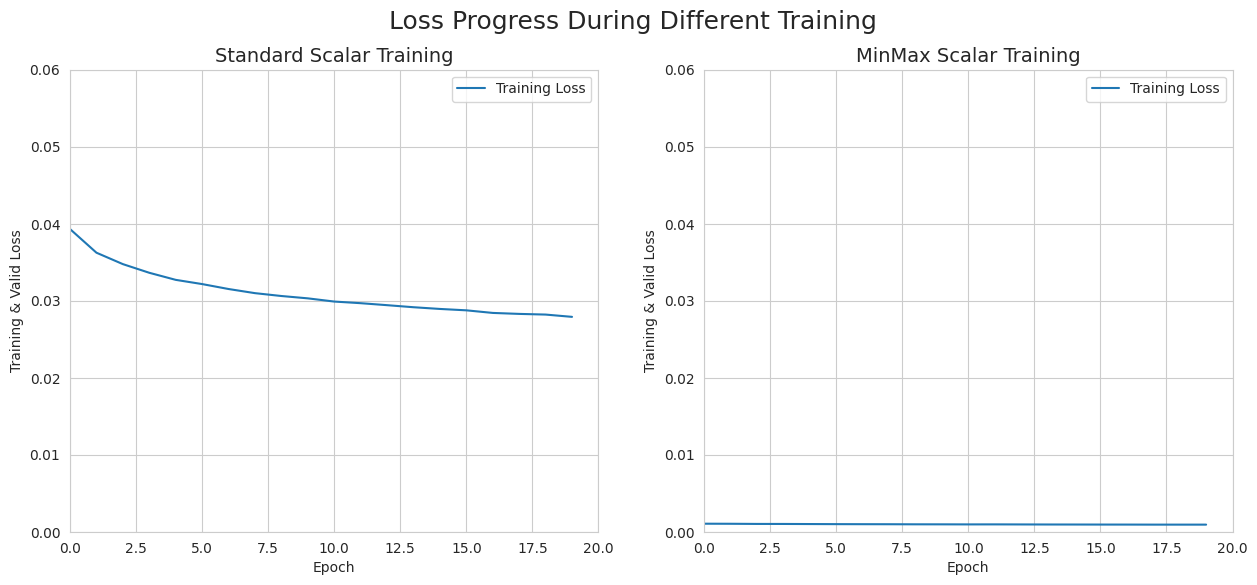

In [ ]:
# Tạo figure và axes objects cho subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Trực quan hóa dữ liệu trên subplot đầu tiên
ax1.plot(epochs_hist.history['loss'])
ax1.set_title('Standard Scalar Training', fontsize=14)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Training & Valid Loss')
ax1.set_xlim(0,20)
ax1.set_ylim(0,0.06)
ax1.legend(['Training Loss','Valid Loss'])

# Trực quan hóa dữ liệu trên subplot thứ hai
ax2.plot(epochs_hist_m.history['loss'])
ax2.set_title('MinMax Scalar Training', fontsize=14)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Training & Valid Loss')
ax2.set_xlim(0,20)
ax2.set_ylim(0,0.06)
ax2.legend(['Training Loss','Valid Loss'])

# Hiển thị biểu đồ
plt.suptitle('Loss Progress During Different Training', fontsize=18)
plt.legend(['Training Loss','Valid Loss'])
plt.show()


####**Biểu đồ dự đoán từ Mô hình ANN MinMaxScalar

2814/2814 [==============================] - 5s 2ms/step


Text(0.5, 1.0, 'True Value v/s Predicted Value (Scaled)')

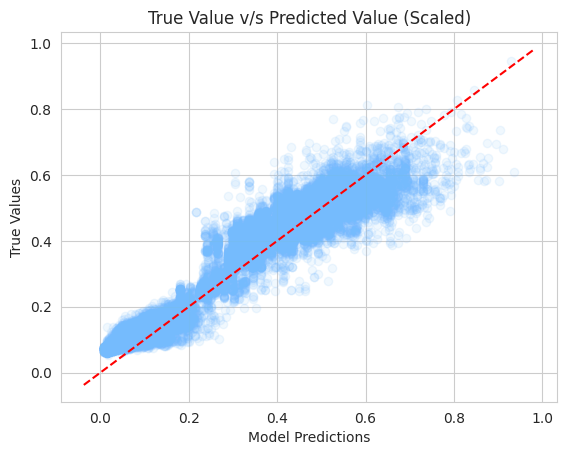

In [ ]:
# Dự đoán mô hình
y_predict_m = ANN_model.predict(X_test_m)

# Trực quan hóa kết quả
plt.plot(figsize=(15, 8))
plt.plot(y_test_m, y_predict_m, "o", color = 'xkcd:sky blue', alpha = 0.1)
x = np.linspace(*plt.xlim())
plt.plot(x, x, color='red', linestyle='--')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.title('True Value v/s Predicted Value (Scaled)')

####**Kết quả của Mô hình định giá vé máy bay theo yêu cầu người dùng.

In [ ]:
# Đảo ngược dữ liệu được chia tỷ lệ
y_predict_orig_m = minmax_y.inverse_transform(y_predict_m)
y_test_orig_m = minmax_y.inverse_transform(y_test_m)

In [ ]:
# Kết quả của mô hình Deep Learning
# Độ chính xác (%)
score = round((accuracy_ANN_m)*100, 3)
# Sai số bình phương trung bình
mse = round(mean_squared_error(y_test_orig_m, y_predict_orig_m), 3)
# Sai số bình phương trung bình căn
rmse = round(np.sqrt(mean_squared_error(y_test_orig_m, y_predict_orig_m)), 3)
# Hệ số xác định R
r2 = round(r2_score(y_test_orig_m, y_predict_orig_m), 3)
# Sai số tuyệt đối trung bình
mae = mean_absolute_error(y_test_orig_m, y_predict_orig_m)

# Lưu kết quả vào DataFrame
result = pd.DataFrame({
        'Model Name': 'Artificial Neural Network',
        'Accuracy(%)': [score],
        'Mean Squared Error (MSE)': [mse],
        'Root Mean Squared Error (RMSE)': [rmse],
        'R-squared (R2-Score)': [r2],
        'Mean Absolute Error (MAE)': [mae]
    })

# In kết quả
result

Model Name  Accuracy(%)  Mean Squared Error (MSE)  \
0  Artificial Neural Network       99.762                      0.07   

   Root Mean Squared Error (RMSE)  R-squared (R2-Score)  \
0                           0.265                  0.93   

   Mean Absolute Error (MAE)  
0                   0.234174

#Các mô hình dự đoán liên quan

####**Thu thập dữ liệu và Tiền xử lý dữ liệu

In [ ]:
# Đọc tệp cleaned_flight_dataset đã được lưu từ Tiền xử lý
df = pd.read_csv('cleaned_flight_dataset.csv')
# Bỏ các cột không bắt buộc để phân tích
df = df.drop(['Date of Journey', 'Flight Code'], axis=1)
# Tách tập dữ liệu từ Cột cuối cùng
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
# Áp dụng One-Hot Encoding cho các cột phân loại
ct = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(drop='first',handle_unknown='ignore'),
    ['Airline','Source City','Destination City','Journey Class','Departure Time','Arrival Time', 'Day of Week'])
],remainder='passthrough')

# Điều chỉnh và chuyển đổi mô hình với các giá trị được mã hóa
X= ct.fit_transform(X)
X

<300159x35 sparse matrix of type '<class 'numpy.float64'>'
	with 2563450 stored elements in Compressed Sparse Row format>

In [ ]:
# Thực hiện lại test_train_split để có dữ liệu mới
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=36)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(210111, 35)
(90048, 35)
(210111,)
(90048,)


In [ ]:
# Chuyển đổi y thành float để prediction
y = np.array(y).astype('float32')

####**Model



*   `LinearRegression` là một thuật toán học máy sử dụng để tìm mối quan hệ tuyến tính giữa các biến đầu vào và biến đầu ra liên tục. Nó tạo ra một mô hình tuyến tính dựa trên dữ liệu huấn luyện và sử dụng mô hình này để dự đoán giá trị đầu ra cho các dữ liệu mới.
*   `DecisionTreeRegressor` là một thuật toán học máy sử dụng cây quyết định để dự đoán giá trị đầu ra liên tục. Nó phân chia tập dữ liệu thành các phân vùng dựa trên các đặc tính và quyết định tại mỗi nút của cây. DecisionTreeRegressor có khả năng xử lý dữ liệu số và phân loại, mô hình hóa mối quan hệ phi tuyến và xử lý dữ liệu thiếu và nhiễu.
*   `RandomForestRegressor` là một thuật toán học máy được sử dụng để dự đoán giá trị đầu ra liên tục bằng cách kết hợp nhiều cây quyết định (Decision Tree) thành một mô hình. Nó giúp giảm hiện tượng overfitting và có khả năng xử lý dữ liệu thiếu và nhiễu.
*   `Lasso` là một thuật toán học máy được sử dụng trong bài toán hồi quy để tìm một mô hình tối ưu và thực hiện lựa chọn đặc trưng. Nó áp dụng phạt lên các hệ số của các đặc trưng không quan trọng và giúp giảm độ phức tạp của mô hình.
*   `XGBRegressor` là một thuật toán học máy sử dụng trong bài toán hồi quy. Nó được xây dựng dựa trên thuật toán Gradient Boosting và sử dụng cây quyết định làm bộ phân loại cơ sở. XGBRegressor có khả năng xử lý các bài toán hồi quy phức tạp và tương đối nhanh chóng. Nó cung cấp các thông số cấu hình linh hoạt cho việc tinh chỉnh mô hình.
*   `AdaBoostRegressor` là một thuật toán học máy sử dụng trong bài toán hồi quy. Nó tạo ra một chuỗi các mô hình hồi quy yếu và kết hợp chúng để tạo ra một mô hình hồi quy mạnh. AdaBoostRegressor có khả năng xử lý các bài toán hồi quy phức tạp và tránh overfitting.
*   `GradientBoostingRegressor` là một thuật toán học máy dùng trong bài toán hồi quy. Nó tạo ra một chuỗi các cây quyết định để dự đoán giá trị đầu ra. Thuật toán này cải thiện dự đoán sau mỗi bước bằng cách tìm kiếm các cây quyết định mới để xử lý các sai số còn lại. GradientBoostingRegressor có khả năng xử lý bài toán hồi quy phức tạp và cung cấp kết quả chính xác.
*   `CatBoostRegressor` là một thuật toán học máy được sử dụng trong bài toán hồi quy. Nó tối ưu hóa đặc biệt cho dữ liệu có đặc tính dạng chuỗi và tự động xử lý các biến category. Nó cung cấp tính năng kiểm soát quá khớp và tăng tốc độ huấn luyện.



####**Fitting các model

#####Khai báo biến

In [ ]:
# Gán model cho các biến
lr = LinearRegression()
dt1 = DecisionTreeRegressor()
dt2 = DecisionTreeRegressor()
rf = RandomForestRegressor()
ls = Lasso()
XGB = xgb.XGBRegressor()
abr = AdaBoostRegressor()
gb = GradientBoostingRegressor()
cat = CatBoostRegressor()

In [ ]:
# Tạo một pipeline chứa danh sách các mô hình hoặc bước xử lý dữ liệu.
pipeline= [lr, dt1, dt2, rf, ls, XGB, abr, gb, cat]

#####Fitting mô hình Linear Regression

In [ ]:
# Fitting
lr.fit(X_train, y_train)
# Kết quả dự đoán
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([ 5251.62367064, 52465.01533683,  4143.3431652 , ...,
        6576.42974834,  8462.10830266, 53566.10838374])

#####Fitting mô hình Decision Tree

Tìm tham số tốt nhất cho mô hình Decision Tree

In [ ]:
#Khai báo parameter grid cho GridSearchCV trong decision tree
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5, 10],
}

In [ ]:
# Sử dụng cross validation và grid search Decision Tree
cv = KFold(n_splits=10, random_state=42, shuffle=True)
dt1 = GridSearchCV(estimator=dt1, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')

In [ ]:
# Fitting
dt1.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
# In các tham số tốt nhất của Decision Tree dựa trên các tham số được cung cấp
print(f"Best hyperparameters: {dt1.best_params_}")
print(f"Best cross-validation score: {-dt1.best_score_:.2f}")

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best cross-validation score: 9501751.12


Áp dụng các tham số tốt nhất để Fitting mô hình Decision Tree

In [ ]:
# Điều chỉnh mô hình
dt1 = DecisionTreeRegressor(max_depth=None, min_samples_split=10, min_samples_leaf= 2)
# Fitting
dt1.fit(X_train, y_train)
# Kết quả dự đoán
y_pred_dt = dt1.predict(X_test)
y_pred_dt

array([ 3194.75, 51457.  ,  2074.  , ...,  4819.75,  4964.5 , 43885.  ])

So sánh với mô hình Decision Tree khác không được điều chỉnh với các tham số

In [ ]:
# Mô hình với max_depth = 5
dt2 = DecisionTreeRegressor(max_depth=5, min_samples_split=10)
# Fitting
dt2.fit(X_train, y_train)
# Kết quả dự đoán
y_pred = dt2.predict(X_test)
y_pred

array([ 4095.55221771, 57065.88782623,  4095.55221771, ...,
        5962.61735245,  4450.54305913, 57065.88782623])

#####Fitting mô hình Random Tree

In [ ]:
#Khai báo parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'random_state': [75]
}

In [ ]:
#Mô hình Random forest với hyperparameters được điều chỉnh
rf = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=75)
# Fitting
rf.fit(X_train, y_train)
# Kết quả dự đoán
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([ 3240.45685386, 55241.65083398,  2347.31224453, ...,
        6250.85059378,  5827.69074569, 49005.12352525])

#####Fitting mô hình Lasso

In [ ]:
# Mô hình Lasso
ls = Lasso(alpha = 50,max_iter = 100,tol=0.1)
# Fitting
ls.fit(X_train, y_train)
# Kết quả dự đoán
y_pred_ls = ls.predict(X_test)
y_pred_ls

array([ 4675.93302033, 53078.32928749,  4794.03922555, ...,
        7544.30953221,  6896.65733601, 54077.36365004])

#####Fitting mô hình XGBRegressor

In [ ]:
# Mô hình XGBRegressor
XGB = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 42)
# Fitting
XGB.fit(X_train, y_train)
# Kết quả dự đoán
y_pred_xgb = XGB.predict(X_test)
y_pred_xgb

array([ 3584.1658, 52773.61  ,  3762.9639, ...,  6394.0483,  5974.834 ,
       52635.14  ], dtype=float32)

#####Fitting mô hình AdaBoostRegressor

In [ ]:
# Mô hình AdaBoostRegressor
abr = AdaBoostRegressor(n_estimators=50, learning_rate=0.1, random_state=42)
# Fitting
abr.fit(X_train, y_train)
# Kết quả dự đoán
y_pred_abr = abr.predict(X_test)
y_pred_abr

array([ 3241.38333859, 58789.40052411,  3204.41614082, ...,
        5614.72830529,  5614.72830529, 58789.40052411])

#####Fitting mô hình GradientBoostingRegressor

In [ ]:
# Mô hình GradientBoostingRegressor
gb = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, max_depth=3)
# Fitting
gb.fit(X_train, y_train)
# Kết quả dự đoán
y_pred_gb = gb.predict(X_test)
y_pred_gb

array([ 3579.69647446, 54868.38200714,  3090.47078089, ...,
        6299.55193842,  5920.0220038 , 56280.51674395])

#####Fitting mô hình CatBoostRegressor

In [ ]:
# Mô hình CatBoostRegressor
cat = CatBoostRegressor(loss_function='RMSE', learning_rate=0.05, n_estimators=200, max_depth=6)
# Fitting
cat.fit(X_train, y_train)
# Kết quả dự đoán
y_pred_cat = cat.predict(X_test)
y_pred_cat

0:	learn: 21654.7028028	total: 88.5ms	remaining: 17.6s
1:	learn: 20651.4712059	total: 128ms	remaining: 12.6s
2:	learn: 19701.9274490	total: 155ms	remaining: 10.2s
3:	learn: 18800.8252735	total: 184ms	remaining: 8.99s
4:	learn: 17947.5282238	total: 213ms	remaining: 8.29s
5:	learn: 17150.7521425	total: 241ms	remaining: 7.8s
6:	learn: 16396.1535413	total: 269ms	remaining: 7.42s
7:	learn: 15673.8659170	total: 303ms	remaining: 7.28s
8:	learn: 14994.8233399	total: 331ms	remaining: 7.03s
9:	learn: 14352.8293196	total: 368ms	remaining: 6.99s
10:	learn: 13749.4974918	total: 396ms	remaining: 6.79s
11:	learn: 13176.3074316	total: 424ms	remaining: 6.64s
12:	learn: 12641.5547541	total: 453ms	remaining: 6.51s
13:	learn: 12136.0070292	total: 479ms	remaining: 6.37s
14:	learn: 11664.2677205	total: 510ms	remaining: 6.29s
15:	learn: 11216.8938587	total: 559ms	remaining: 6.42s
16:	learn: 10794.4588811	total: 594ms	remaining: 6.39s
17:	learn: 10395.6645028	total: 622ms	remaining: 6.29s
18:	learn: 10020.433

array([ 4270.53217643, 52549.68009986,  2985.96250144, ...,
        6523.1750268 ,  6065.15467586, 55999.63334309])

####**Định nghĩa hàm đưa ra kết quả

In [ ]:
# Hàm tính toán hiệu suất của pipeline
def evaluate_pipeline(pipeline, y_pred_all, model_name):
    # Độ chính xác (%)
    score = round((pipeline.score(X_test, y_test)*100), 2)
    # Sai số bình phương trung bình
    mse = round(mean_squared_error(y_test, y_pred_all), 3)
    # Sai số bình phương trung bình căn
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred_all)), 3)
    # Hệ số xác định R
    r2 = round(r2_score(y_test, y_pred_all), 3)
    # Sai số tuyệt đối trung bình
    mae = mean_absolute_error(y_test, y_pred_all)

    # Lưu kết quả vào DataFrame
    metrics = pd.DataFrame({
        'Model Name': model_name,
        'Accuracy(%)': [score],
        'Mean Squared Error (MSE)': [mse],
        'Root Mean Squared Error (RMSE)': [rmse],
        'R-squared (R2-Score)': [r2],
        'Mean Absolute Error (MAE)': [mae]
    })

    # Hàm trả về một DataFrame pandas
    return metrics

In [ ]:
# Tính toán hiệu suất của các model
r1 = evaluate_pipeline(lr, y_pred_lr, 'Linear Regression')
r2 = evaluate_pipeline(dt1,y_pred_dt, 'Decision Tree - Best Tuned')
r3 = evaluate_pipeline(dt2,y_pred, 'Decision Tree - Basic Tuned')
r4 = evaluate_pipeline(rf, y_pred_rf, 'Random Forest')
r5 = evaluate_pipeline(ls, y_pred_ls, 'Lasso Regression')
r6 = evaluate_pipeline(XGB, y_pred_xgb, 'XGBoost')
r7 = evaluate_pipeline(abr, y_pred_abr, 'AdaBoost')
r8 = evaluate_pipeline(gb, y_pred_gb, 'Gradient Boost')
r9 = evaluate_pipeline(cat, y_pred_cat, 'CatBoost Regressor')

# Thêm các biến kết quả vào df all_results
all_results = pd.concat([r1, r2, r3, r4, r5, r6, r7, r8, r9], ignore_index=True)

# Thêm results ( model Deep Learning) vào all_results
all_results = pd.concat([all_results, result], ignore_index=True)
all_results

Model Name  Accuracy(%)  Mean Squared Error (MSE)  \
0            Linear Regression       90.950              4.657037e+07   
1   Decision Tree - Best Tuned       98.210              9.200596e+06   
2  Decision Tree - Basic Tuned       94.230              2.970222e+07   
3                Random Forest       98.460              7.902766e+06   
4             Lasso Regression       90.800              4.731344e+07   
5                      XGBoost       95.700              2.209272e+07   
6                     AdaBoost       93.460              3.362439e+07   
7               Gradient Boost       95.210              2.462751e+07   
8           CatBoost Regressor       95.960              2.079983e+07   
9    Artificial Neural Network       99.762              7.000000e-02   

   Root Mean Squared Error (RMSE)  R-squared (R2-Score)  \
0                        6824.248                 0.909   
1                        3033.249                 0.982   
2                        5449.974                 0.942   
3                        2811.186                 0.985   
4                        6878.476                 0.908   
5                        4700.289                 0.957   
6                        5798.654                 0.935   
7                        4962.611                 0.952   
8                        4560.683                 0.960   
9                           0.265                 0.930   

   Mean Absolute Error (MAE)  
0                4537.824925  
1                1178.515598  
2                3201.268597  
3                1330.760183  
4                4496.023281  
5                2713.864223  
6                3609.402612  
7                2951.880408  
8                2701.555890  
9                   0.234174

####**Biểu đồ Scatter so sánh

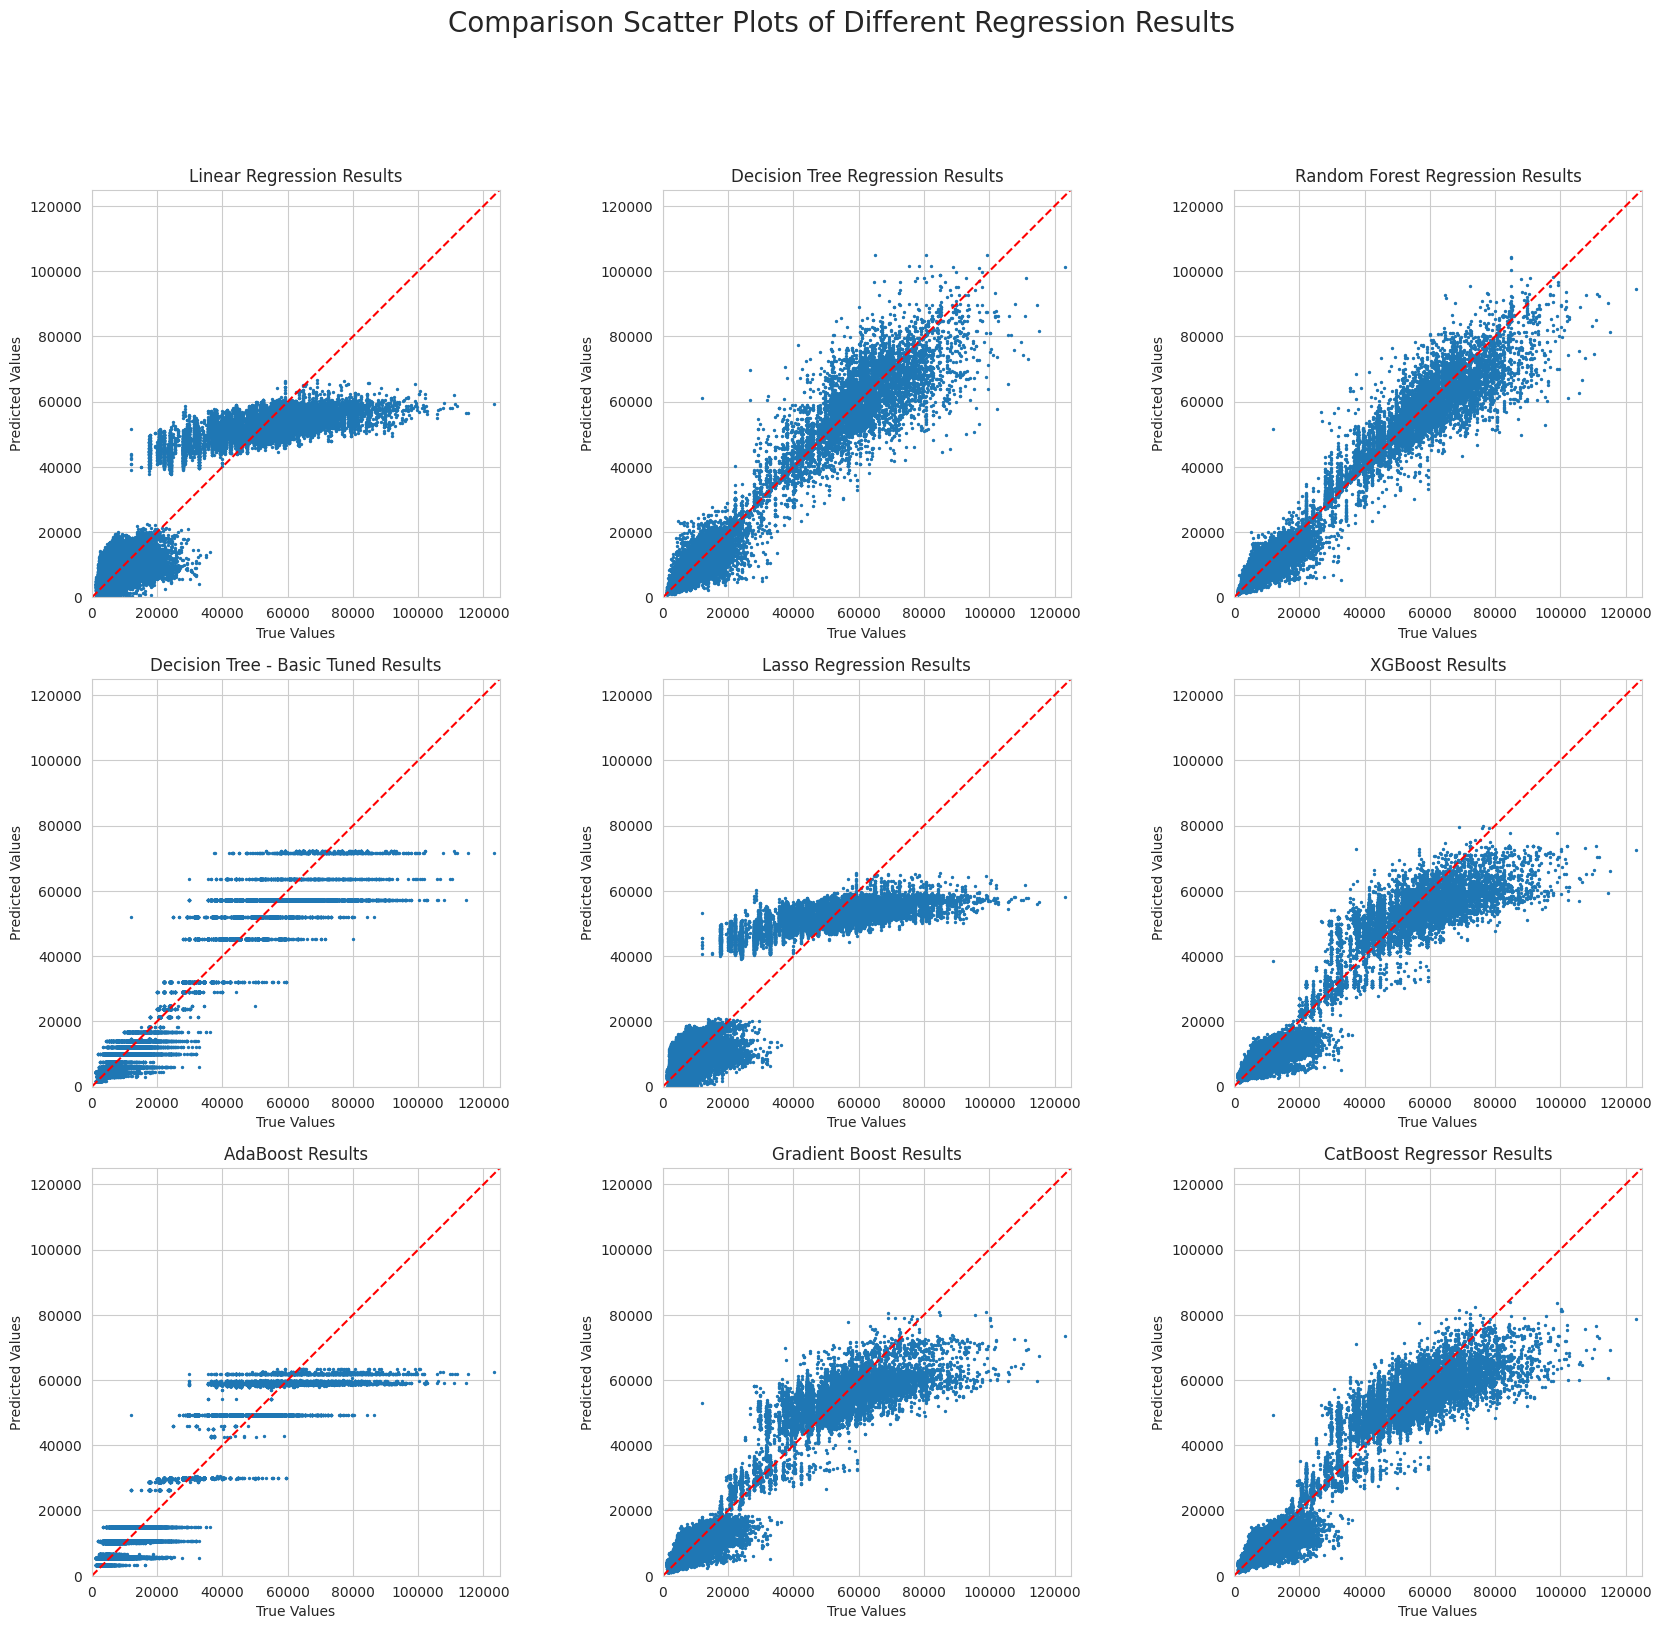

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(20, 18))
# Mô hình Linear Regression
ax1.scatter(y_test, y_pred_lr, s=2)
ax1.set_title('Linear Regression Results')
ax1.set_xlabel('True Values')
ax1.set_ylabel('Predicted Values')
ax1.set_ylim(0,125000)
ax1.set_xlim(0,125000)

# Mô hình Decision Tree Regression
ax2.scatter(y_test, y_pred_dt, s=2)
ax2.set_title('Decision Tree Regression Results')
ax2.set_xlabel('True Values')
ax2.set_ylabel('Predicted Values')
ax2.set_ylim(0,125000)
ax2.set_xlim(0,125000)

# Mô hình Random Forest Regression
ax3.scatter(y_test, y_pred_rf, s=2)
ax3.set_title('Random Forest Regression Results')
ax3.set_xlabel('True Values')
ax3.set_ylabel('Predicted Values')
ax3.set_ylim(0,125000)
ax3.set_xlim(0,125000)

# Mô hình Decision Tree - Basic Tuned
ax4.scatter(y_test, y_pred, s=2)
ax4.set_title('Decision Tree - Basic Tuned Results')
ax4.set_xlabel('True Values')
ax4.set_ylabel('Predicted Values')
ax4.set_ylim(0,125000)
ax4.set_xlim(0,125000)

# Mô hình Lasso Regression
ax5.scatter(y_test, y_pred_ls, s=2)
ax5.set_title('Lasso Regression Results')
ax5.set_xlabel('True Values')
ax5.set_ylabel('Predicted Values')
ax5.set_ylim(0,125000)
ax5.set_xlim(0,125000)

# Mô hình XGBoost
ax6.scatter(y_test, y_pred_xgb, s=2)
ax6.set_title('XGBoost Results')
ax6.set_xlabel('True Values')
ax6.set_ylabel('Predicted Values')
ax6.set_ylim(0,125000)
ax6.set_xlim(0,125000)

# Mô hình AdaBoost
ax7.scatter(y_test, y_pred_abr, s=2)
ax7.set_title('AdaBoost Results')
ax7.set_xlabel('True Values')
ax7.set_ylabel('Predicted Values')
ax7.set_ylim(0,125000)
ax7.set_xlim(0,125000)

# Mô hình Gradient Boost
ax8.scatter(y_test, y_pred_gb, s=2)
ax8.set_title('Gradient Boost Results')
ax8.set_xlabel('True Values')
ax8.set_ylabel('Predicted Values')
ax8.set_ylim(0,125000)
ax8.set_xlim(0,125000)

# Mô hình CatBoost Regressor
ax9.scatter(y_test, y_pred_cat, s=2)
ax9.set_title('CatBoost Regressor Results')
ax9.set_xlabel('True Values')
ax9.set_ylabel('Predicted Values')
ax9.set_ylim(0,125000)
ax9.set_xlim(0,125000)

# Vẽ đường thẳng y = x trên tất cả các subplot
for ax in (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9):
    x = np.linspace(*plt.xlim())
    ax.plot(x, x, transform=ax.transAxes, ls='--', c='red')

# Điều chỉnh khoảng cách giữa các subplot
fig.subplots_adjust(wspace=0.4)
plt.suptitle("Comparison Scatter Plots of Different Regression Results", fontsize=20)
plt.show()

####**Đồ thị Phân phối tần số Residual error cho tất cả các mô hình

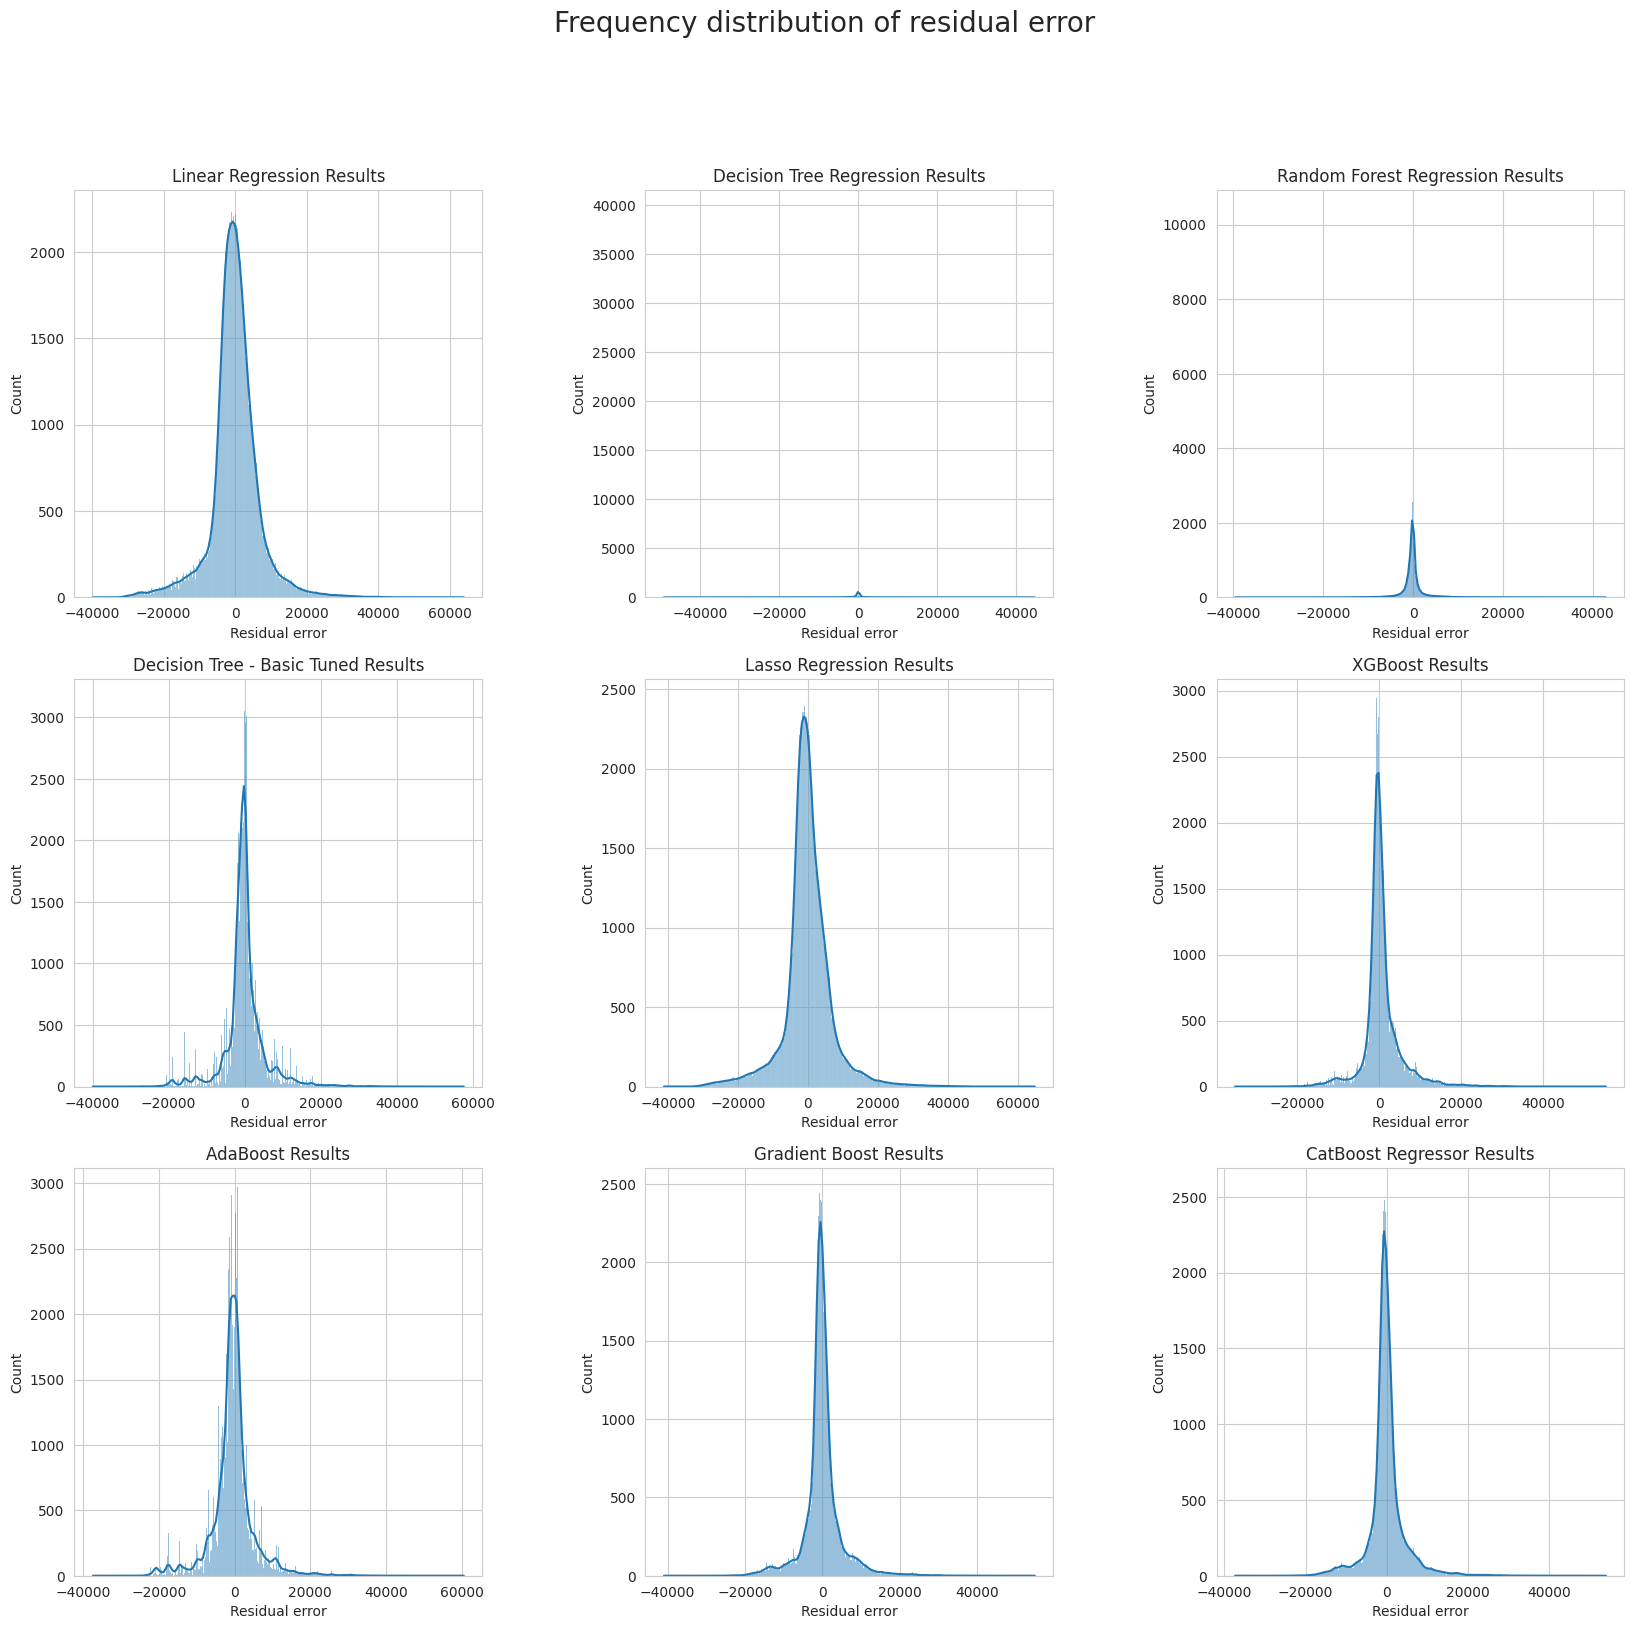

In [ ]:
# Residual error là sự khác biệt giữa giá trị thực tế và giá trị dự đoán.
# Tính giá trị residual của các
residual_lr = y_test - y_pred_lr
residual_dt = y_test - y_pred_dt
residual = y_test - y_pred
residual_rf = y_test - y_pred_rf
residual_ls = y_test - y_pred_ls
residual_xgb = y_test - y_pred_xgb
residual_abr = y_test - y_pred_abr
residual_gb = y_test - y_pred_gb
residual_cat = y_test - y_pred_cat

# Đồ thị Phân phối tần số Residual error cho tất cả các mô hình
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(20, 18))
# Mô hình Linear Regression
sns.histplot(residual_lr, kde=True, ax=ax1)
ax1.set_xlabel('Residual error')
ax1.set_title('Linear Regression Results')

# Mô hình Decision Tree Regression
sns.histplot(residual_dt, kde=True, ax=ax2)
ax2.set_xlabel('Residual error')
ax2.set_title('Decision Tree Regression Results')

# Mô hình Random Forest Regression
sns.histplot(residual_rf, kde=True, ax=ax3)
ax3.set_xlabel('Residual error')
ax3.set_title('Random Forest Regression Results')

# Mô hình Decision Tree - Basic Tuned
sns.histplot(residual, kde=True, ax=ax4)
ax4.set_xlabel('Residual error')
ax4.set_title('Decision Tree - Basic Tuned Results')

# Mô hình Lasso Regression
sns.histplot(residual_ls, kde=True, ax=ax5)
ax5.set_xlabel('Residual error')
ax5.set_title('Lasso Regression Results')

# Mô hình XGBoost
sns.histplot(residual_xgb, kde=True, ax=ax6)
ax6.set_xlabel('Residual error')
ax6.set_title('XGBoost Results')

# Mô hình AdaBoost
sns.histplot(residual_abr, kde=True, ax=ax7)
ax7.set_xlabel('Residual error')
ax7.set_title('AdaBoost Results')

# Mô hình Gradient Boost
sns.histplot(residual_gb, kde=True, ax=ax8)
ax8.set_xlabel('Residual error')
ax8.set_title('Gradient Boost Results')

# Mô hình CatBoost Regressor
sns.histplot(residual_cat, kde=True, ax=ax9)
ax9.set_xlabel('Residual error')
ax9.set_title('CatBoost Regressor Results')

# Điều chỉnh khoảng cách giữa các subplot
fig.subplots_adjust(wspace=0.4)
plt.suptitle('Frequency distribution of residual error', fontsize=20)
plt.show()